# **MEF Metric Plotter - Variants**
## **High Resolution Sea Ice Diagsnostics Toolset**
 Cameron Carver - University of Cape Town - Jan 2025

This script accesses the locally stored multi-model MEF variants file and plots the following for <br> each model with all respective variants in a single plot:<br>
    - Annual Mean<br>
    - Seasonal Mean<br>
    - Monthly Mean<br>
    - Time Series<br>
    - Seasonal Distribution<br>
    - Monthly Distribution<br>

### 1. Import Relevant Packages

In [1]:
import os
# os.chdir('') # User can provide root directory information here to simplify directory path definitions elsewhere 
import xarray as xr
import calendar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap

### 2. Import Model Data
Extract respective categorised MEF Metric variation

#### *CMIP*

In [2]:
# DEF = xr.open_dataset('CMIP-MEF/CMIP-24-MEF_DEF.nc')
# DEF = DEF.sortby('model_name')
# X015 = xr.open_dataset('CMIP-MEF/CMIP-24-MEF_L15.nc')
# X015 = X015.sortby('model_name')
# XL15 = xr.open_dataset('CMIP-MEF/CMIP-24-MEF_ZERO.nc')
# XL15 = XL15.sortby('model_name')
# I015 = xr.open_dataset('CMIP-MEF/CMIP-24-MEF_I015.nc')
# I015 = I015.sortby('model_name')
# I1580 = xr.open_dataset('CMIP-MEF/CMIP-24-MEF_I1580.nc')
# I1580 = I1580.sortby('model_name')
# I80100 = xr.open_dataset('CMIP-MEF/CMIP-24-MEF_I80100.nc')
# I80100 = I80100.sortby('model_name')

# # MEF_a, MEF_s, MEF_m, MEF_b, model = MEF_ds.MEF_a, MEF_ds.MEF_s, MEF_ds.MEF_m, MEF_ds.MEF_b, MEF_ds.model_name.values
# MEF_a = xr.concat([DEF.MEF_a, X015.MEF_a, XL15.MEF_a, I015.MEF_a, I1580.MEF_a, I80100.MEF_a], dim='variation')
# MEF_b = xr.concat([DEF.MEF_b, X015.MEF_b, XL15.MEF_b, I015.MEF_b, I1580.MEF_b, I80100.MEF_b], dim='variation')
# model = xr.concat([DEF.model_name, X015.model_name, XL15.model_name, I015.model_name, I1580.model_name, I80100.model_name], dim='variation')
# vct = MEF_a.variation.size
# mct = MEF_a.models.size
# v = ['Default', 'Excluding [0,15]', 'Isolating 0', 'Isolating (0,15]', 'Isolating (15,80]', 'Isolating (80,100]']

#### *HighResMIP*

In [3]:
DEF = xr.open_dataset('HRMIP-MEF/HRMIP-6-MEF_DEF.nc')
DEF = DEF.sortby('model_name')
X015 = xr.open_dataset('HRMIP-MEF/HRMIP-6-MEF_L15.nc')
X015 = X015.sortby('model_name')
XL15 = xr.open_dataset('HRMIP-MEF/HRMIP-6-MEF_ZERO.nc')
XL15 = XL15.sortby('model_name')
I015 = xr.open_dataset('HRMIP-MEF/HRMIP-6-MEF_I015.nc')
I015 = I015.sortby('model_name')
I1580 = xr.open_dataset('HRMIP-MEF/HRMIP-6-MEF_I1580.nc')
I1580 = I1580.sortby('model_name')
I80100 = xr.open_dataset('HRMIP-MEF/HRMIP-6-MEF_I80100.nc')
I80100 = I80100.sortby('model_name')

# MEF_a, MEF_s, MEF_m, MEF_b, model = MEF_ds.MEF_a, MEF_ds.MEF_s, MEF_ds.MEF_m, MEF_ds.MEF_b, MEF_ds.model_name.values
MEF_a = xr.concat([DEF.MEF_a, X015.MEF_a, XL15.MEF_a, I015.MEF_a, I1580.MEF_a, I80100.MEF_a], dim='variation')
MEF_b = xr.concat([DEF.MEF_b, X015.MEF_b, XL15.MEF_b, I015.MEF_b, I1580.MEF_b, I80100.MEF_b], dim='variation')
model = xr.concat([DEF.model_name, X015.model_name, XL15.model_name, I015.model_name, I1580.model_name, I80100.model_name], dim='variation')
vct = MEF_a.variation.size
mct = MEF_a.models.size
v = ['Default', 'Excluding [0,15]', 'Isolating 0', 'Isolating (0,15]', 'Isolating (15,80]', 'Isolating (80,100]']

### 3. Import Reference Grid and Define Plotting Details
Import the ancillary file of the observational data. <br>
Data Access https://nsidc.org/data/g02202/versions/4 <br>
Ancilliary File: https://noaadata.apps.nsidc.org/NOAA/G02202_V4/ancillary/<br>
Provides the reference grid of which model data will be reprojected onto.

In [4]:
access_ref_data = 'OBSERVATIONS/SICONC/G02202-cdr-ancillary-sh.nc'
ref_ds = xr.open_dataset(access_ref_data)

levels=[ 0, 0.2, 0.5, 0.65, 1.0]
colors = ['peru', 'yellowgreen', 'deepskyblue', 'royalblue']
cmap = mcolors.ListedColormap(colors)
cmap.set_under('darkred')

### 4. Plot Annual Means
Define desired plot image destination and name.

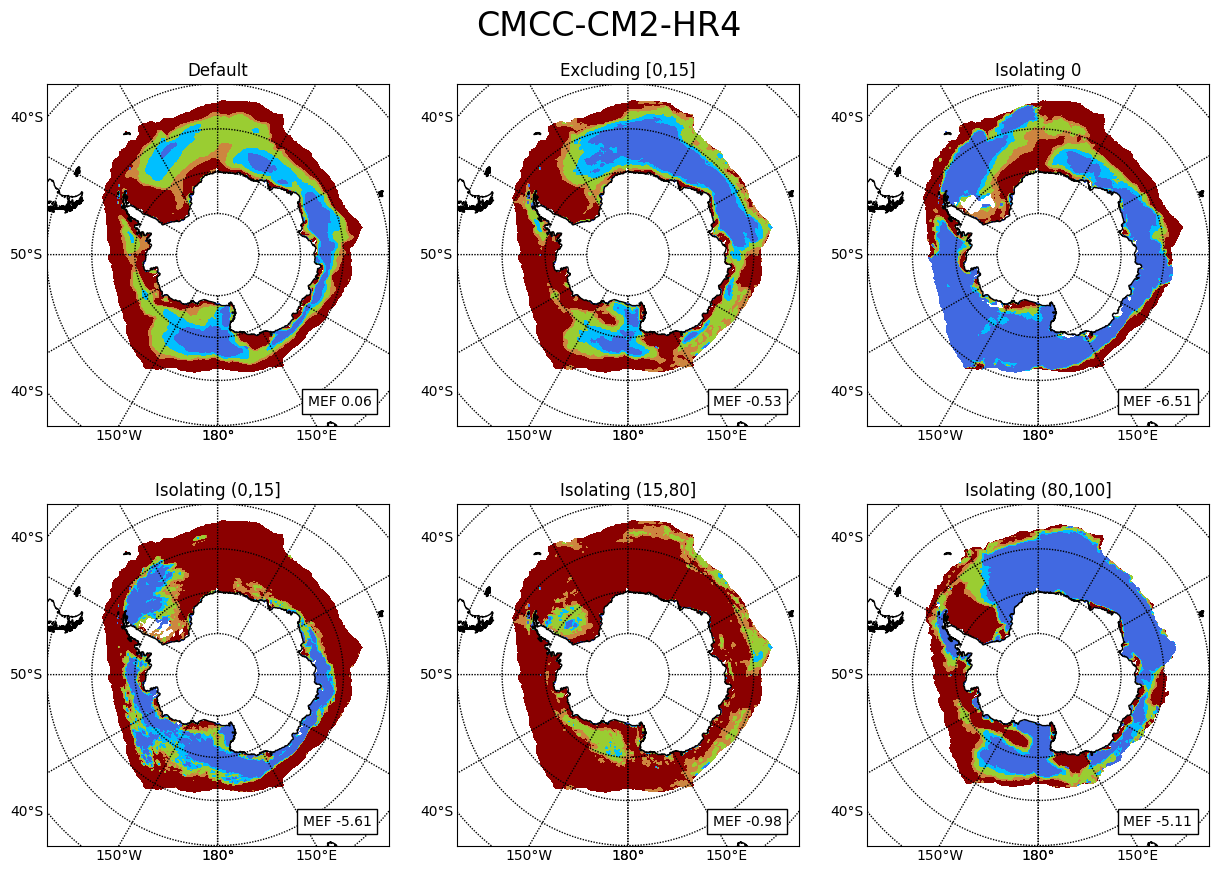

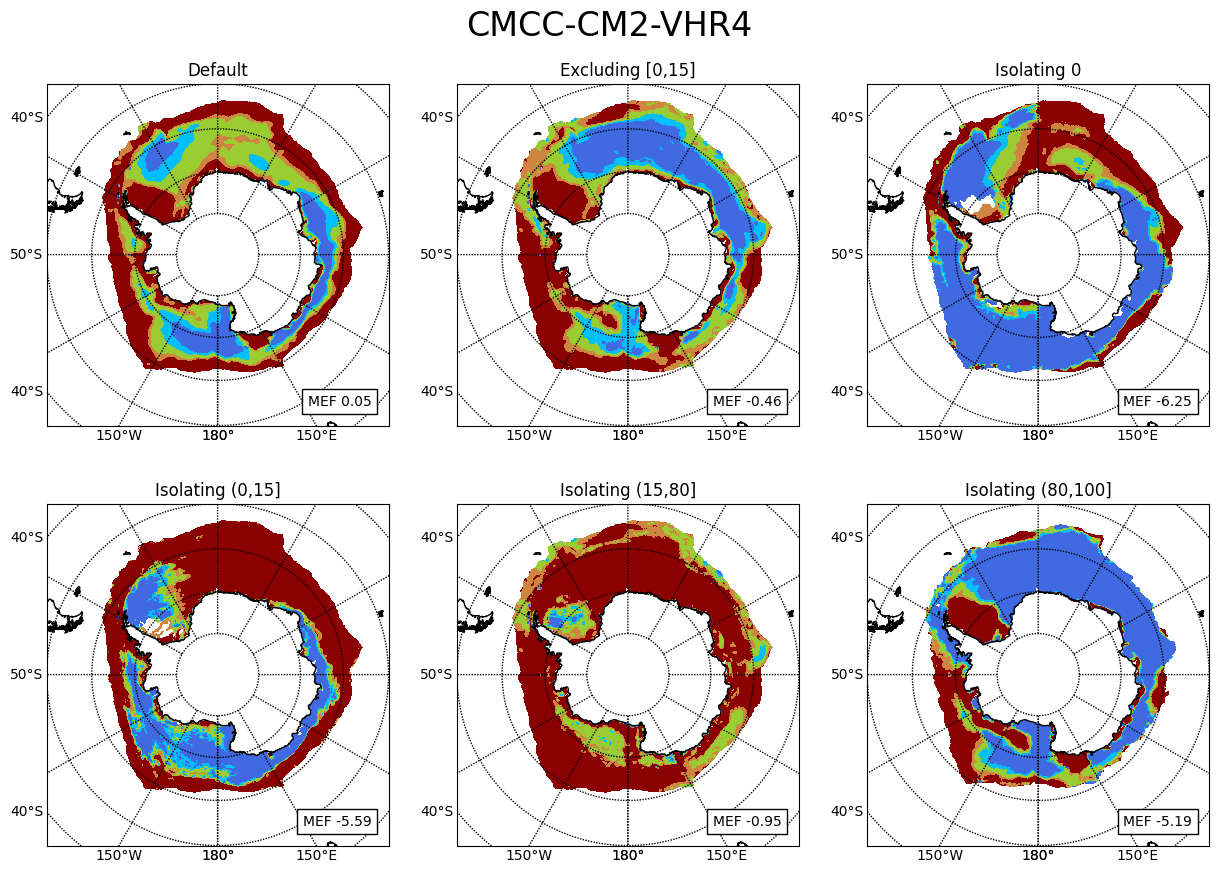

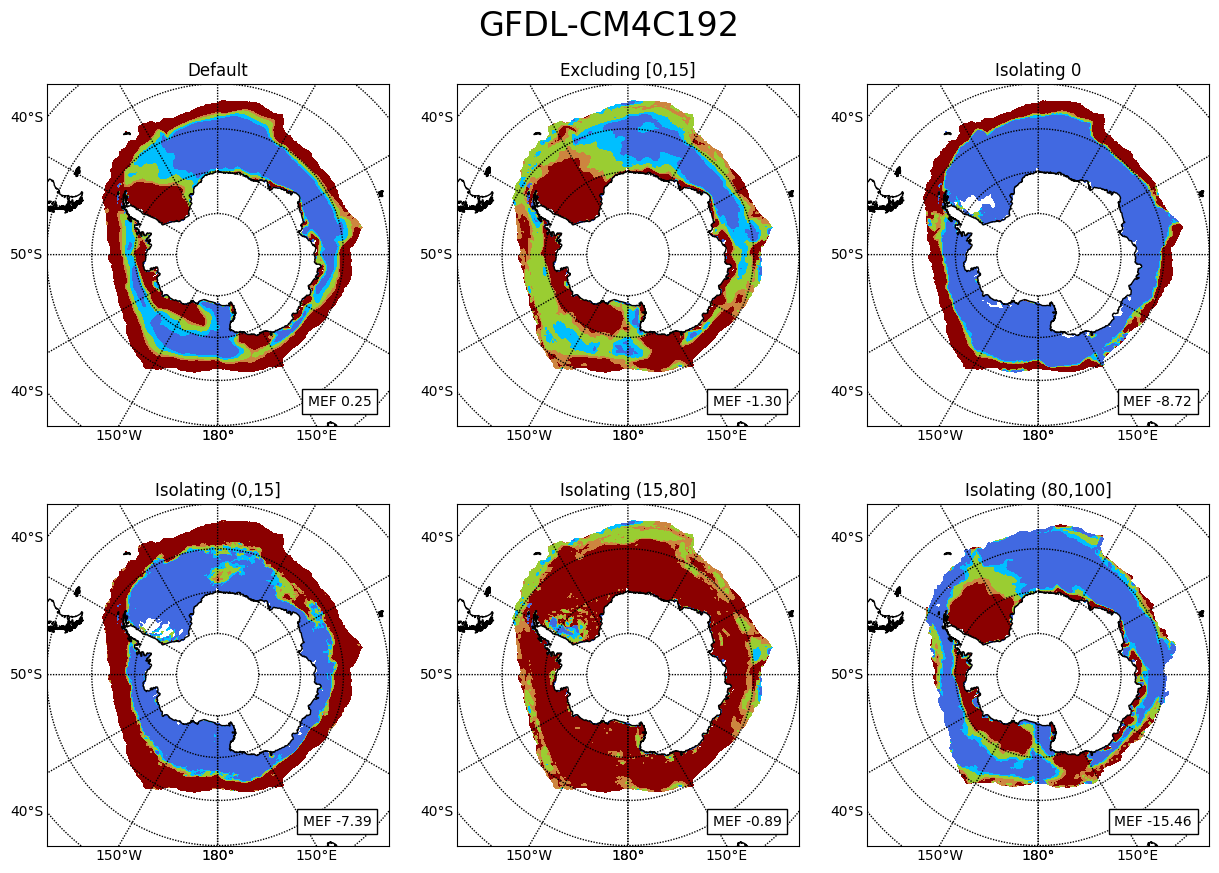

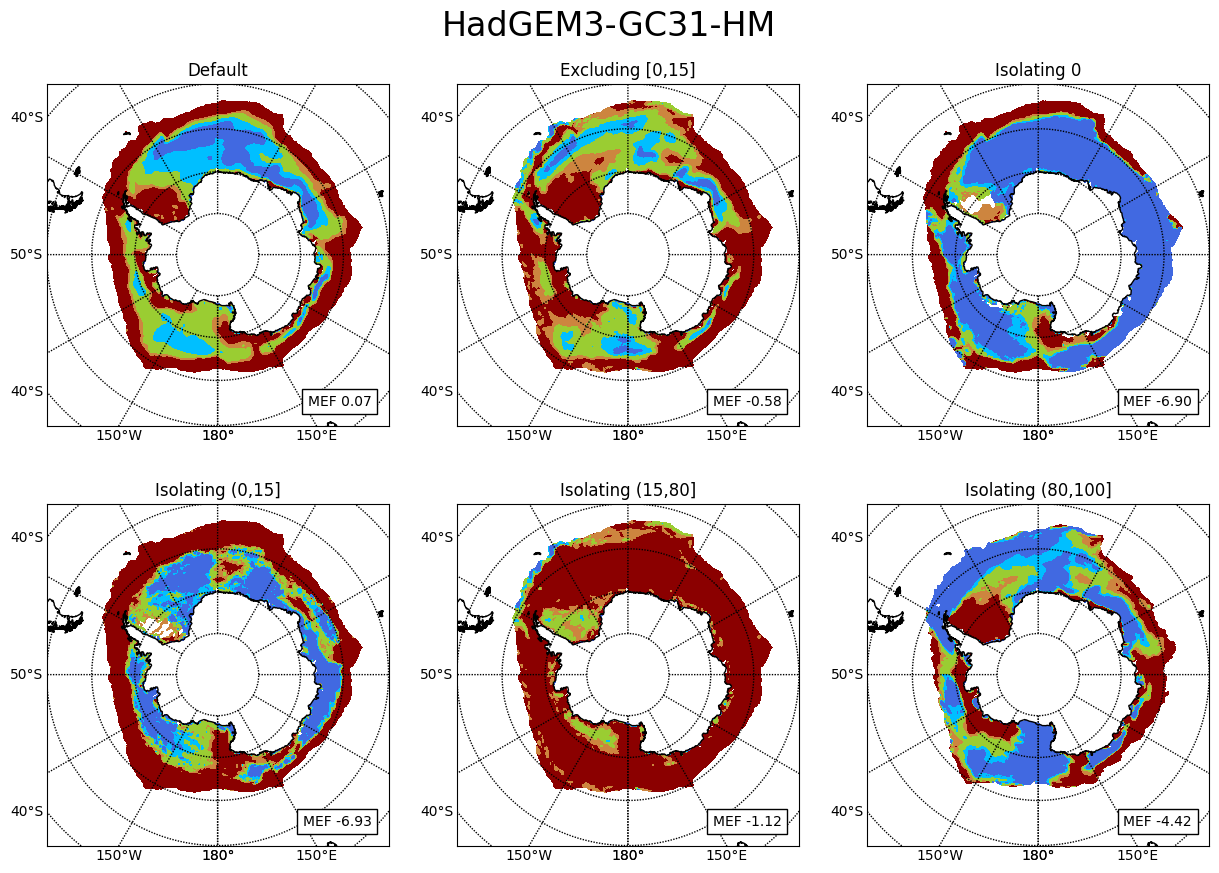

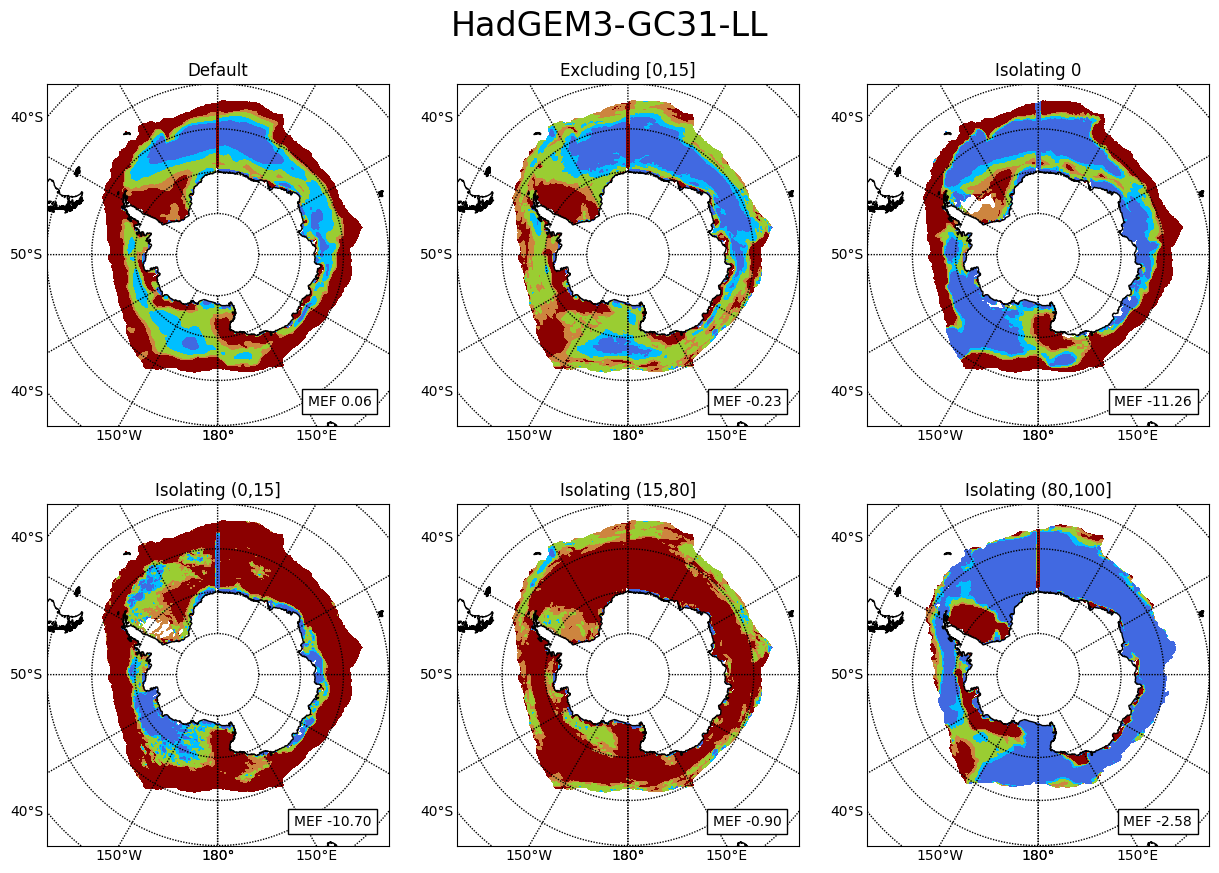

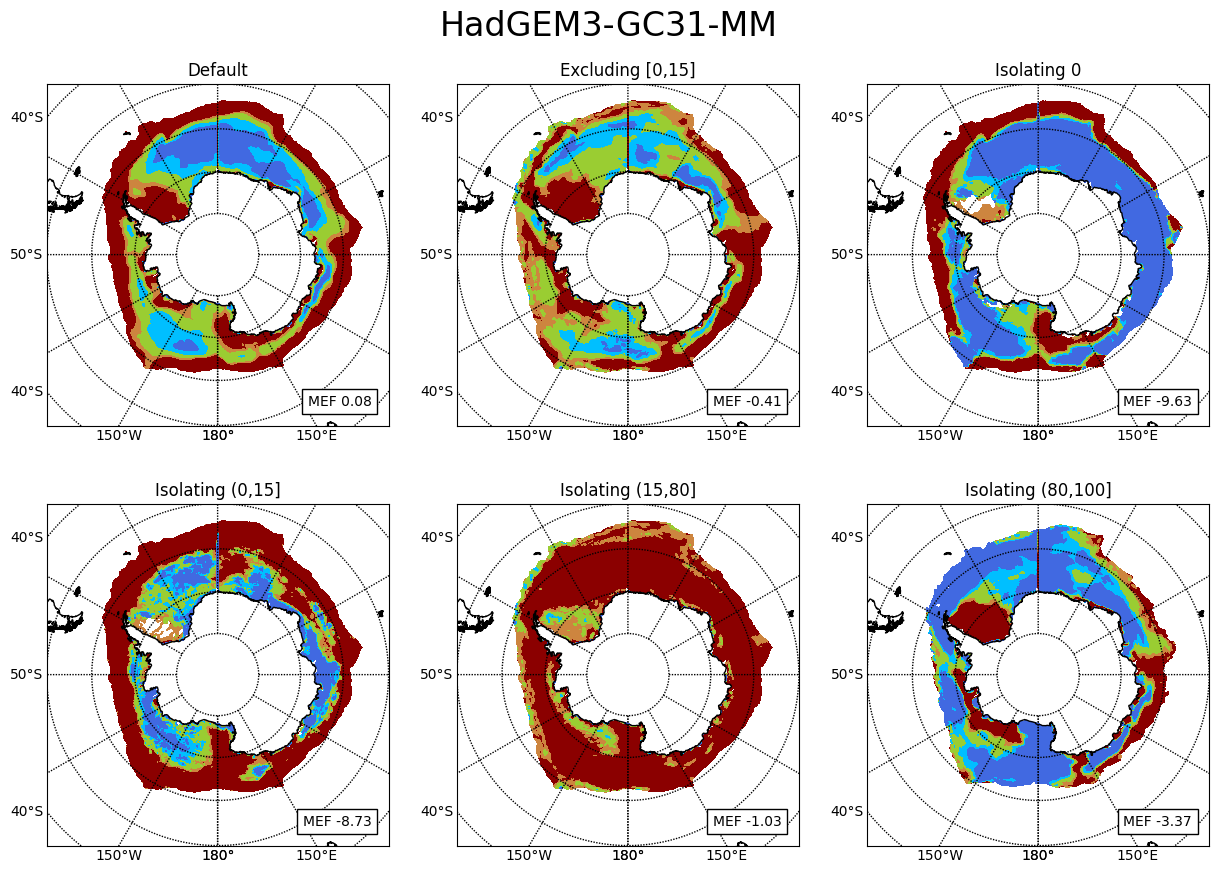

In [5]:
for j in range(0,mct,1):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # Adjust grid size here
    
    for i in range(0,vct,1):
        ax = axes[i // 3, i % 3]
        m = Basemap(projection='spstere', boundinglat=-50, lon_0=180, resolution='l', ax=ax)
        x, y = m(ref_ds.longitude.values, ref_ds.latitude.values)
        contour = m.contourf(x, y, MEF_a[i,j,:,:].values, levels=levels, cmap=cmap, extend='min')
        m.drawcoastlines()
        m.drawparallels(np.arange(-90., 0., 10.), labels=[1,0,0,0])
        m.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1])
        ax.set_title(f'{v[i]}')
        MEFA = MEF_b[i,j,:].mean(dim='tdim').values
        ax.text(0.95, 0.05, f'MEF {MEFA:.2f}', transform=ax.transAxes, fontsize=10,
            verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white'))
        
    fig.suptitle(f'{model[1,j].values}', fontsize=24, y=0.95) 
    # plt.savefig(f'/Data/PLOTS/Variations/Annual-Mean/{model[1,j].values}_AM-V.pdf', bbox_i# Define desired plot image destination and name.nches='tight') 

### 5. Plot MEF Time Series
Define desired plot image destination and name.

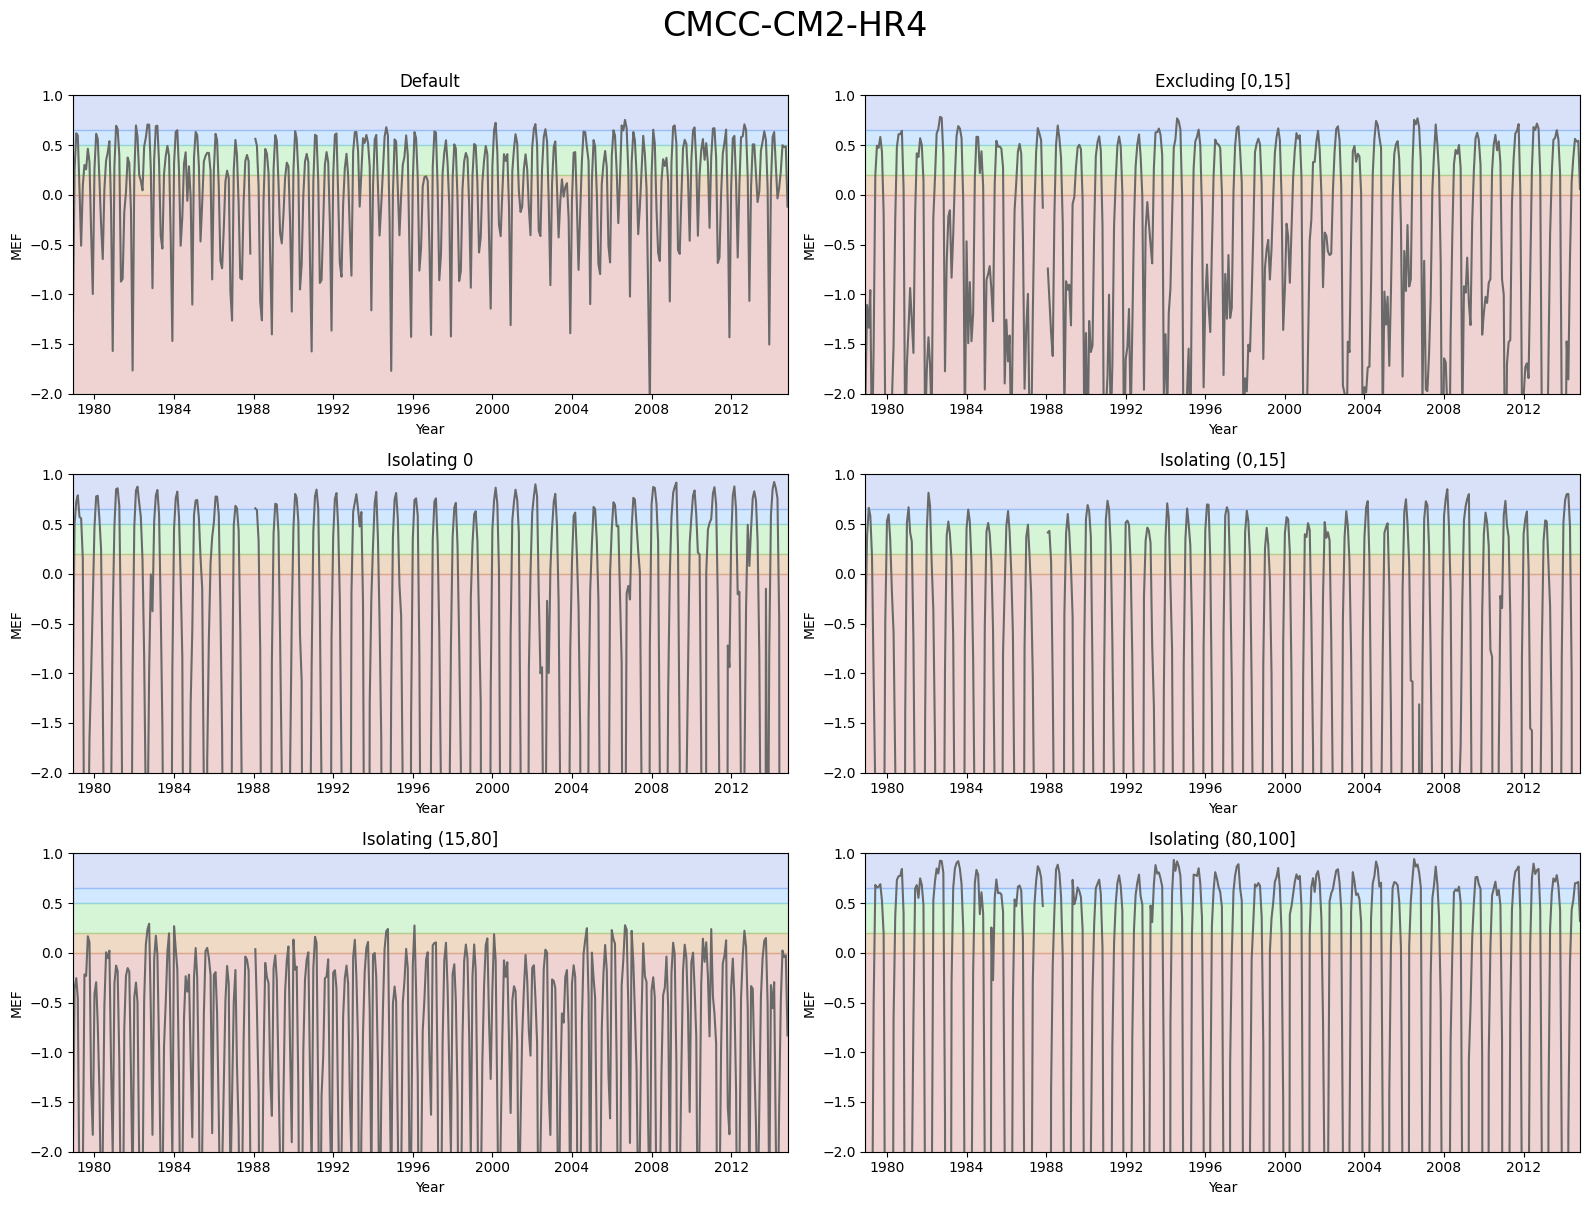

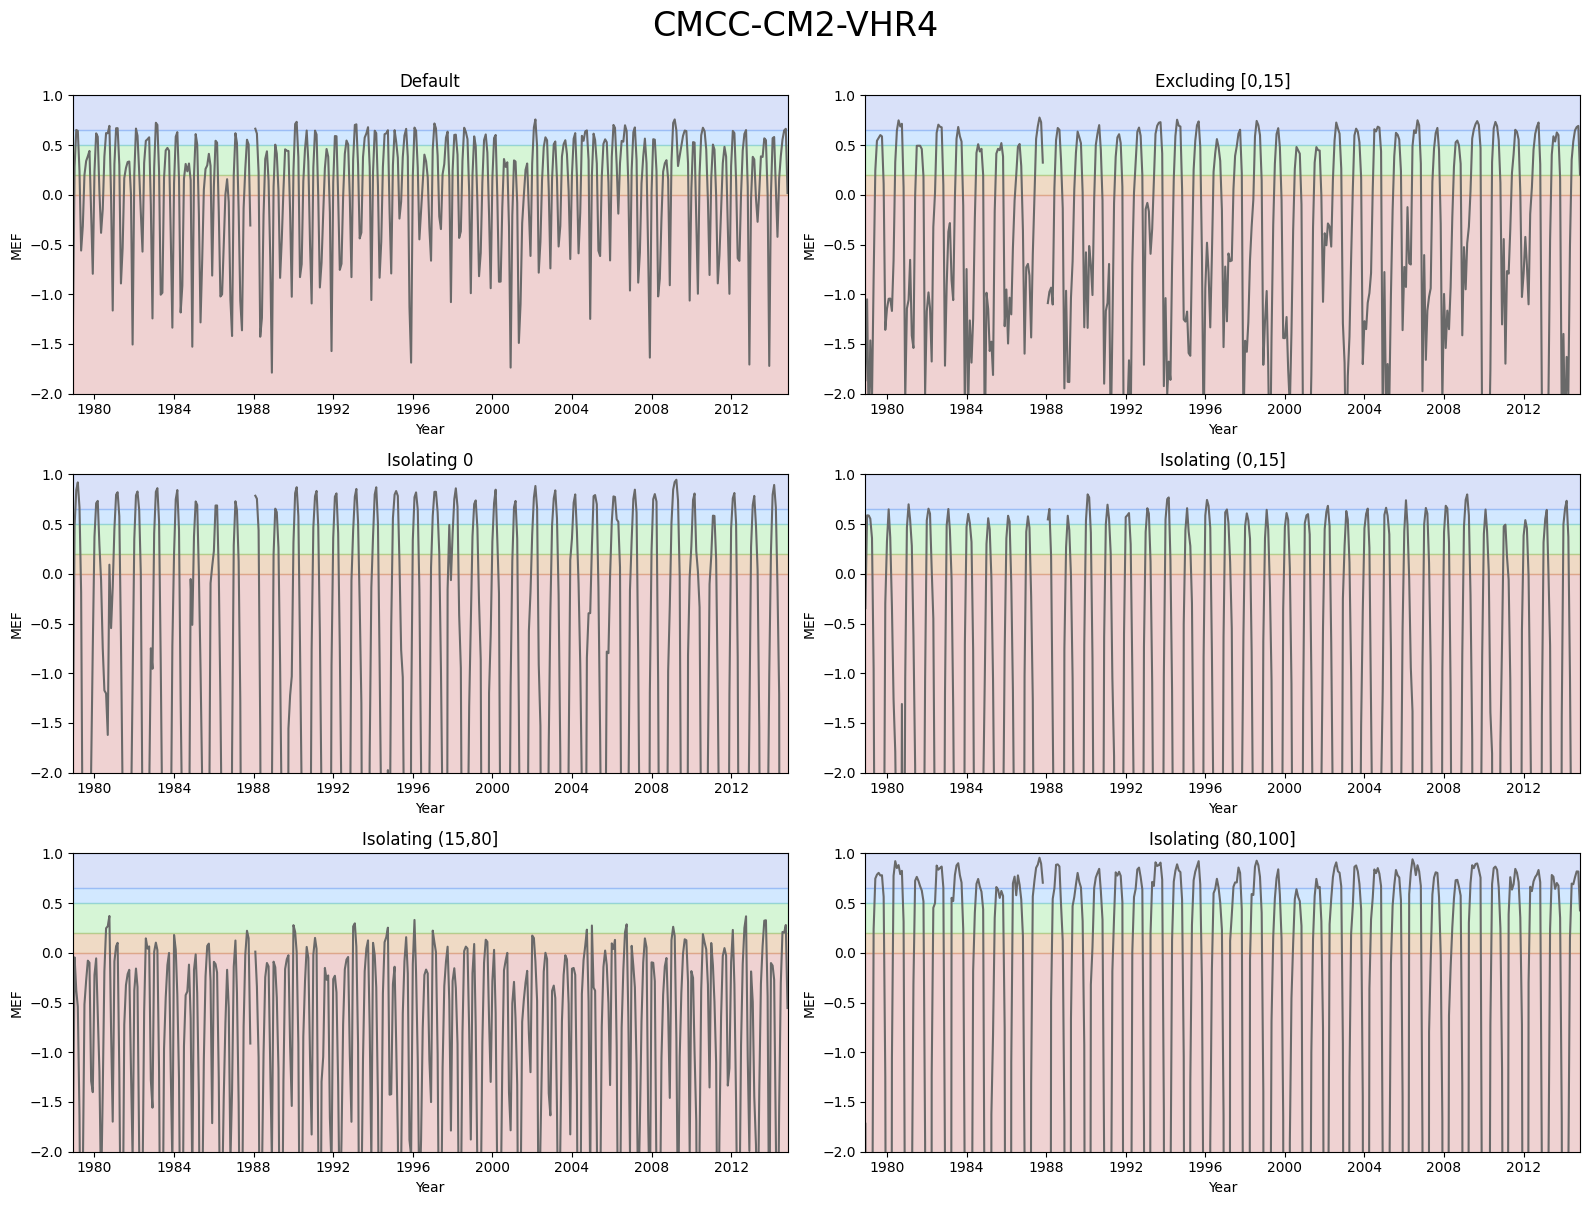

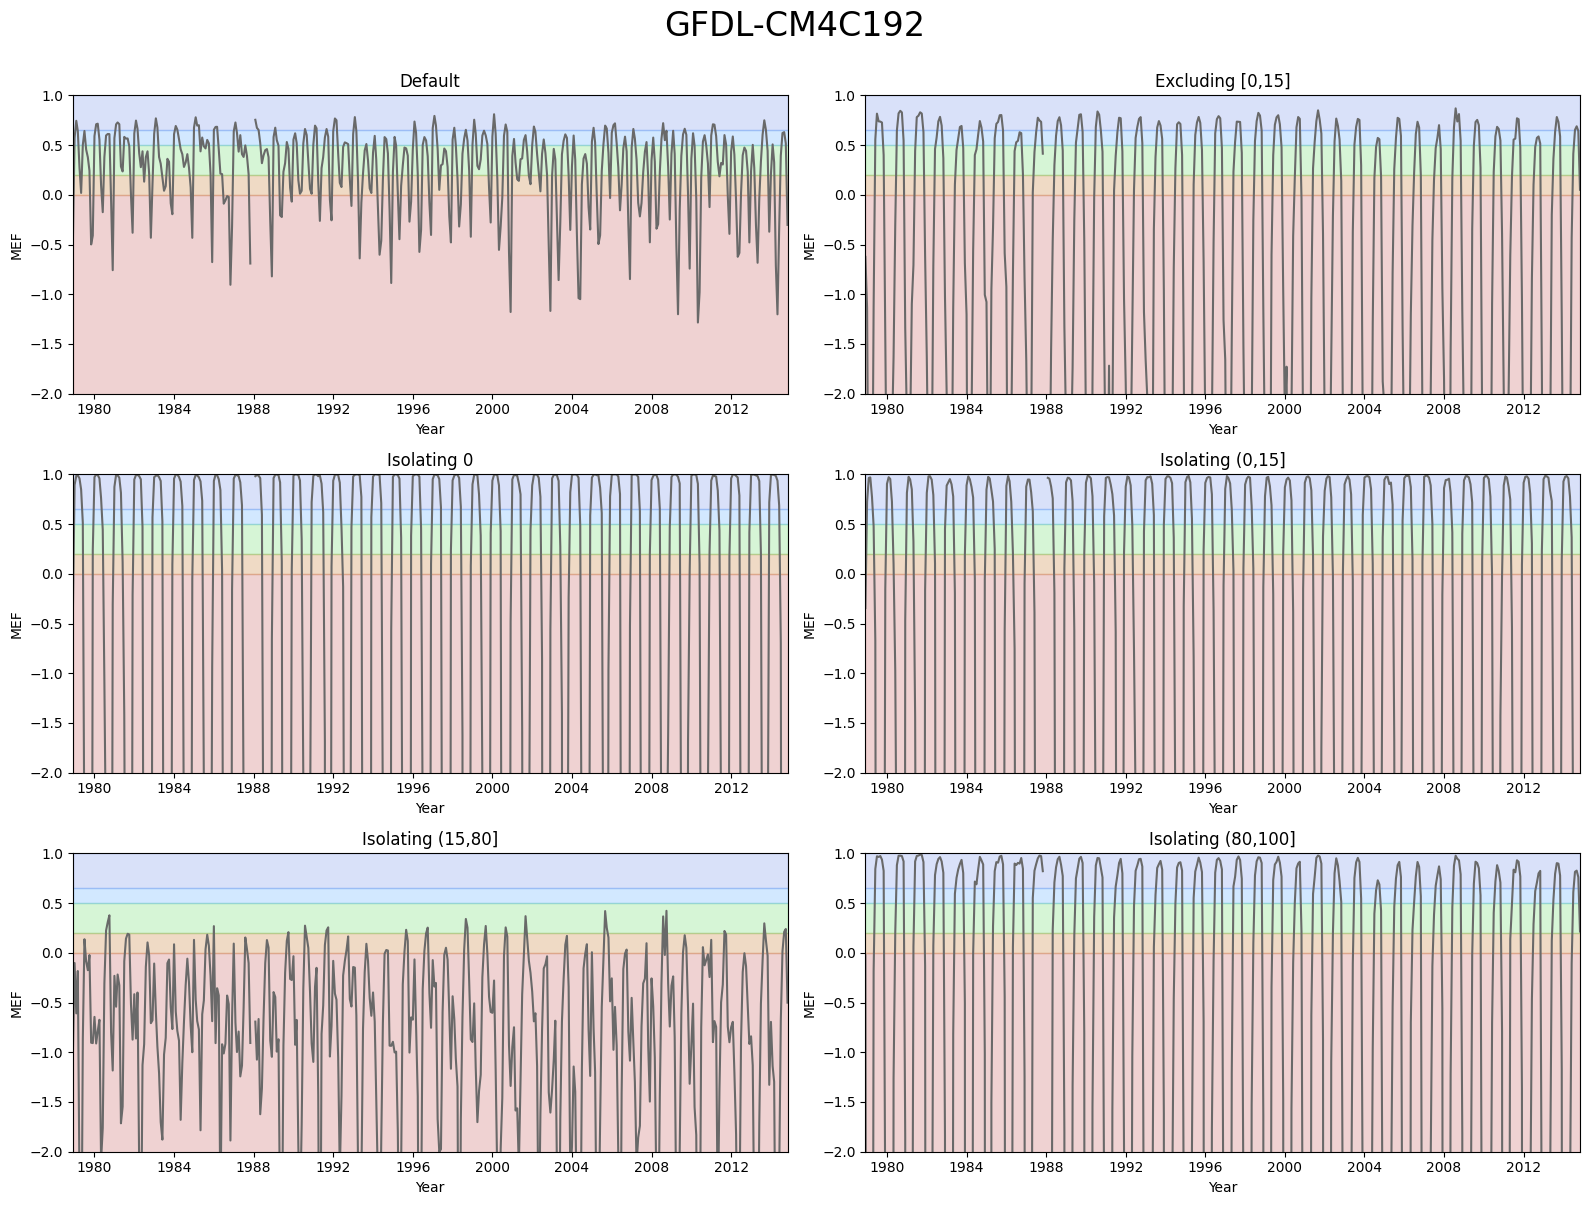

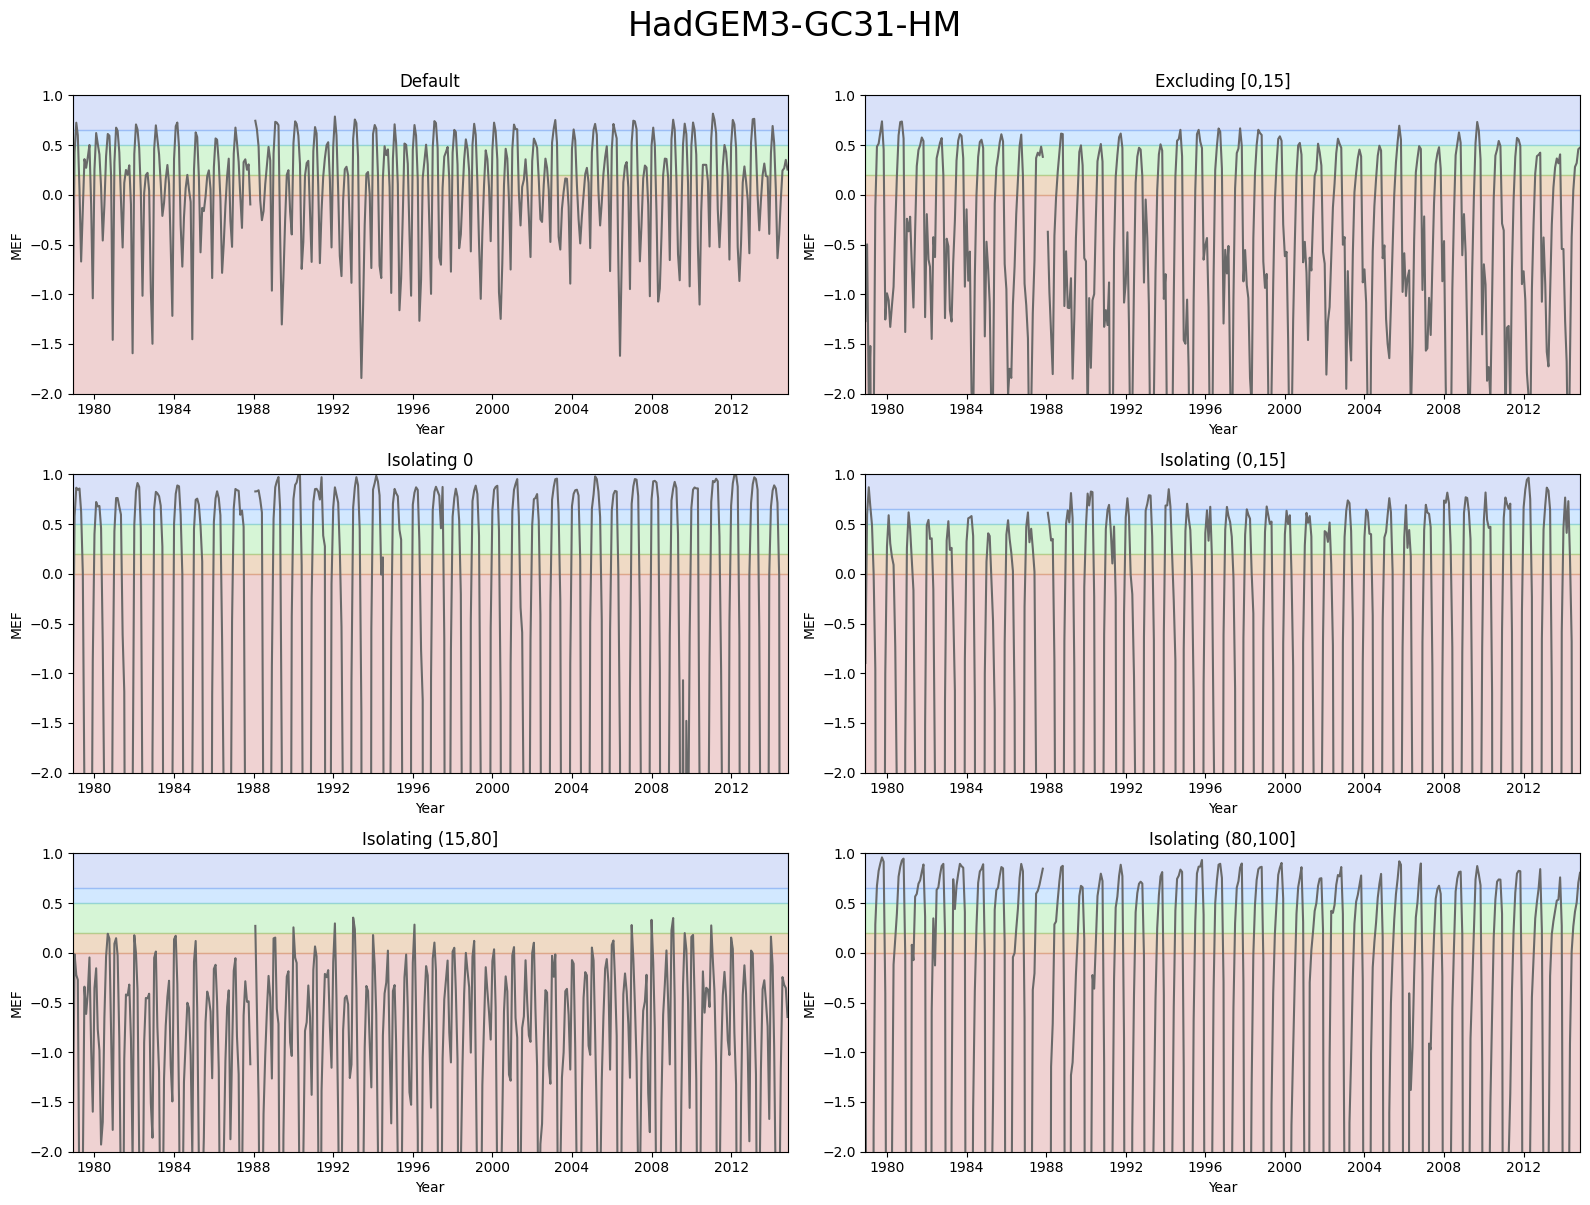

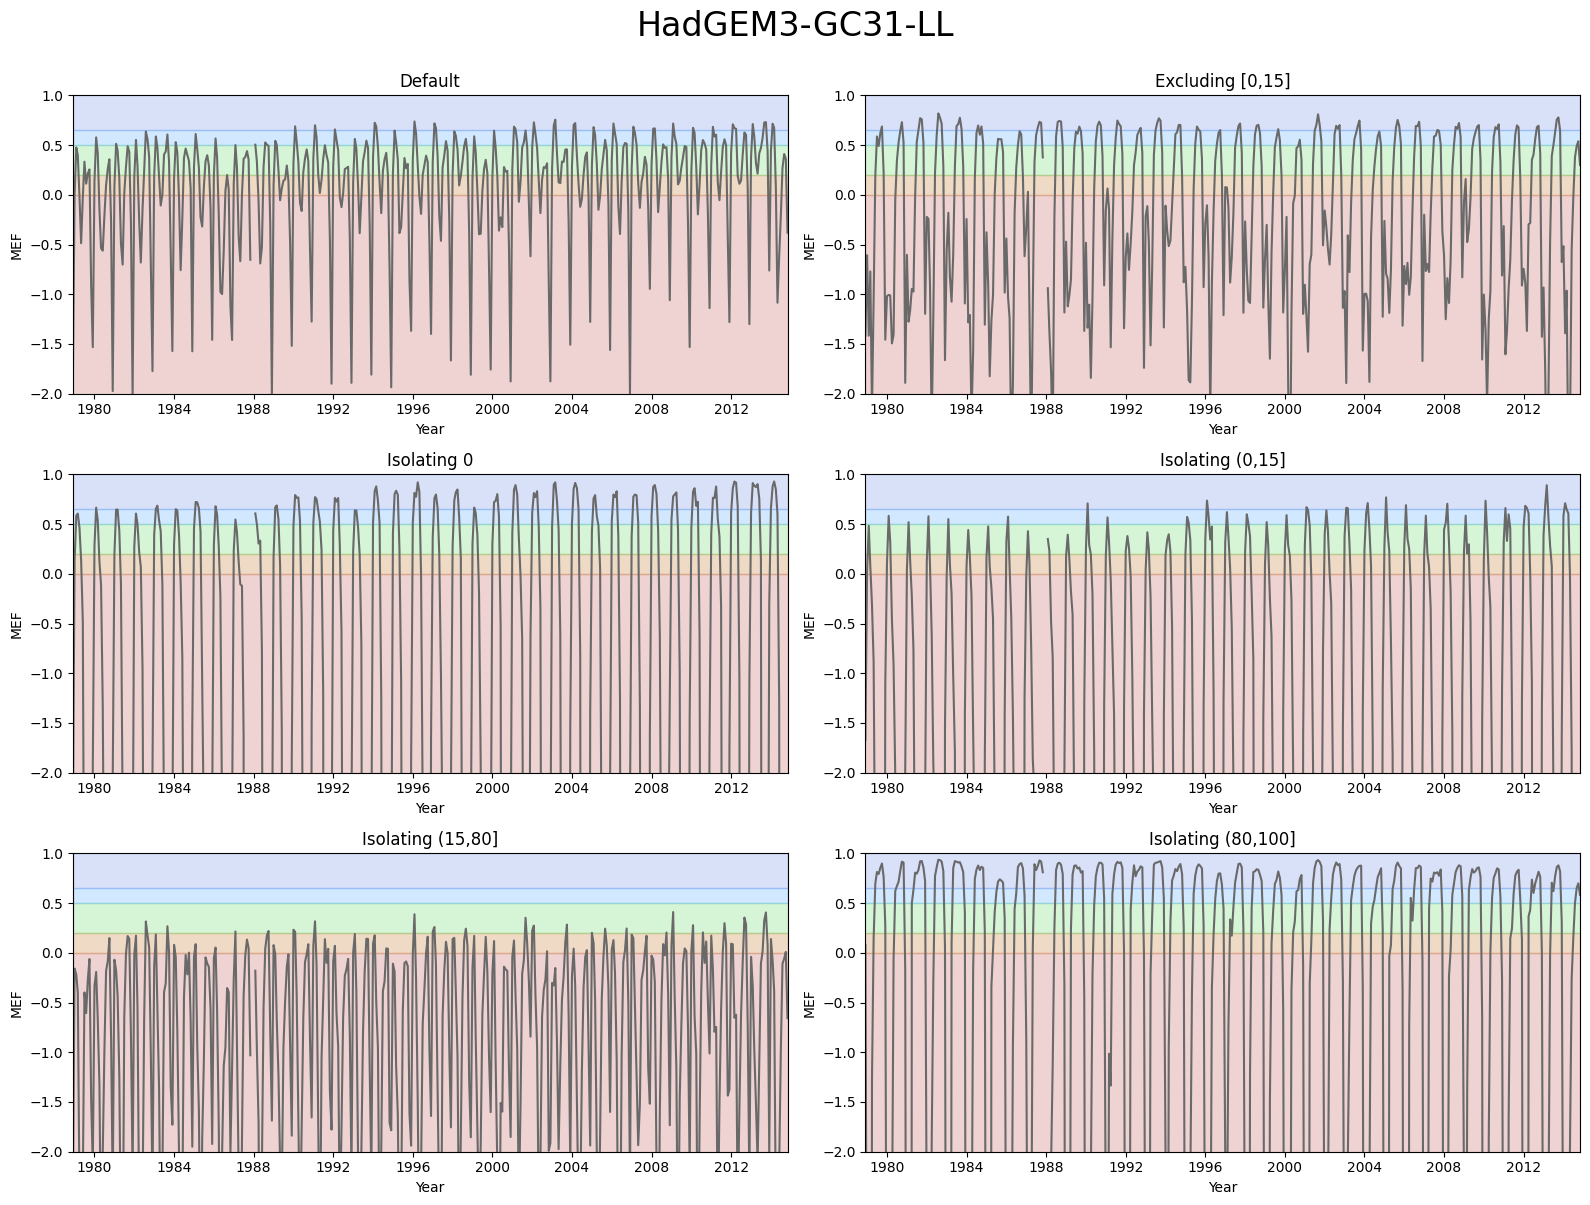

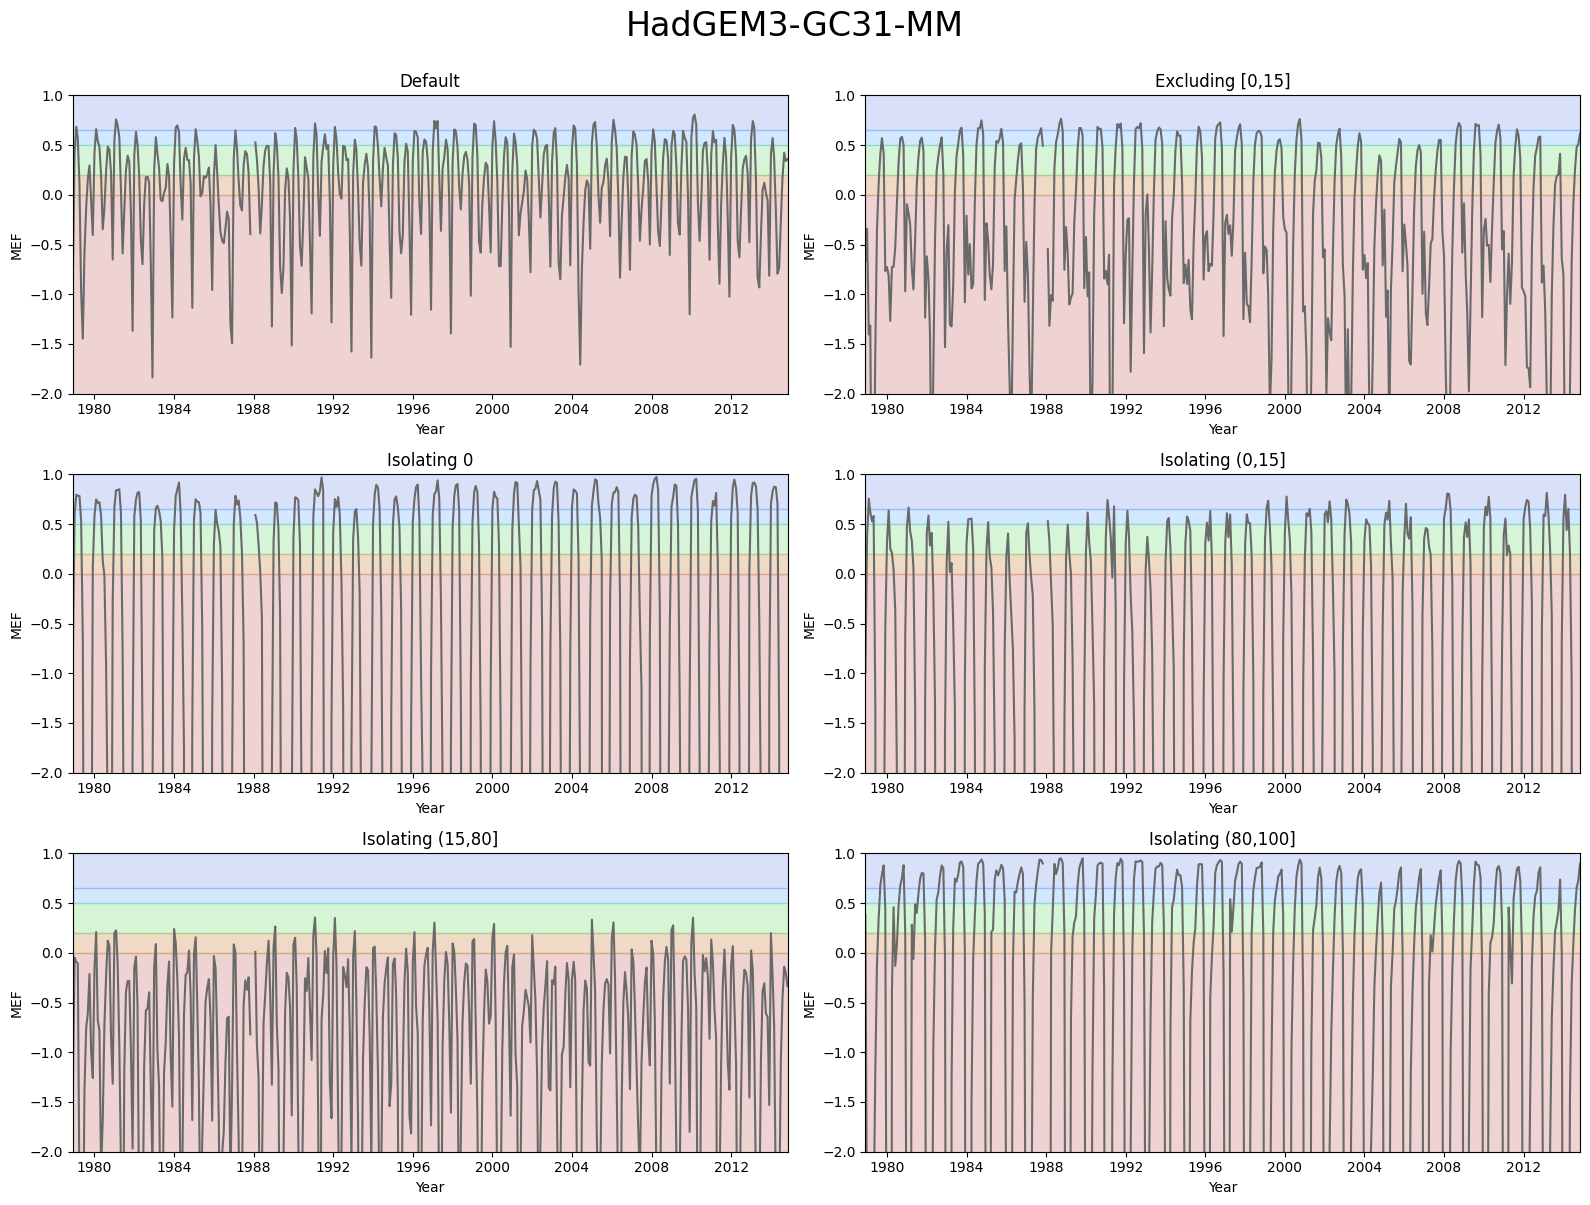

In [6]:
for j in range(0,mct,1):
    fig, axes = plt.subplots(3, 2, figsize=(16,12)) # Adjust grid size here
    
    for i in range(vct):
        ax = axes[i // 2, i % 2]
        MEF_b[i,j,:].plot(color='dimgray', ax=ax)
        ax.set_ylim(bottom=-2, top = 1); ax.set_xlim(MEF_b.time.min(), MEF_b.time.max())
        ax.fill_between(MEF_b.time, -10, 0, color='firebrick', alpha=0.2, label='Bad')
        ax.fill_between(MEF_b.time, 0, 0.2, color='peru', alpha=0.3, label='Poor')
        ax.fill_between(MEF_b.time, 0.2, 0.5, color='limegreen', alpha=0.2, label='Good')
        ax.fill_between(MEF_b.time, 0.5, 0.65, color='dodgerblue', alpha=0.2, label='Very Good')
        ax.fill_between(MEF_b.time, 0.65, 1, color='royalblue', alpha=0.2, label='Excellent')
        ax.set_xlabel('Year'); ax.set_ylabel('MEF'); ax.set_title(f'{v[i]}')
        
    fig.suptitle(f'{model[1,j].values}', fontsize=24, x=0.5, y=1)
    plt.tight_layout()
    # plt.savefig(f'/Data/PLOTS/Variations/Annual-Mean/{model[1,j].values}_TS-V.pdf', bbox_inches='tight') # Define desired plot image destination and name.

### 6. Define Distributon Plot Details

In [7]:
from matplotlib.colors import ListedColormap
import pandas as pd
# %% Plot Details
bins = [-np.inf, 0, 0.2, 0.5, 0.65, np.inf]
bins2 = [-np.inf, 1, 2, 3, 4, np.inf]
labels = ['Bad                   (-∞,0]','Poor                 (0,0.2]','Good             (0.2,0.5]',
          'Very Good   (0.5,0.65]','Excellent        (0.65,1]']
colors = {
    labels[0]: 'firebrick',
    labels[1]: 'sandybrown',
    labels[2]: 'yellowgreen',
    labels[3]: 'skyblue',
    labels[4]: 'royalblue',
}
cmap = ListedColormap(colors)

### 7. Plot Seasonal Performance Distributions
Define desired plot image destination and name.

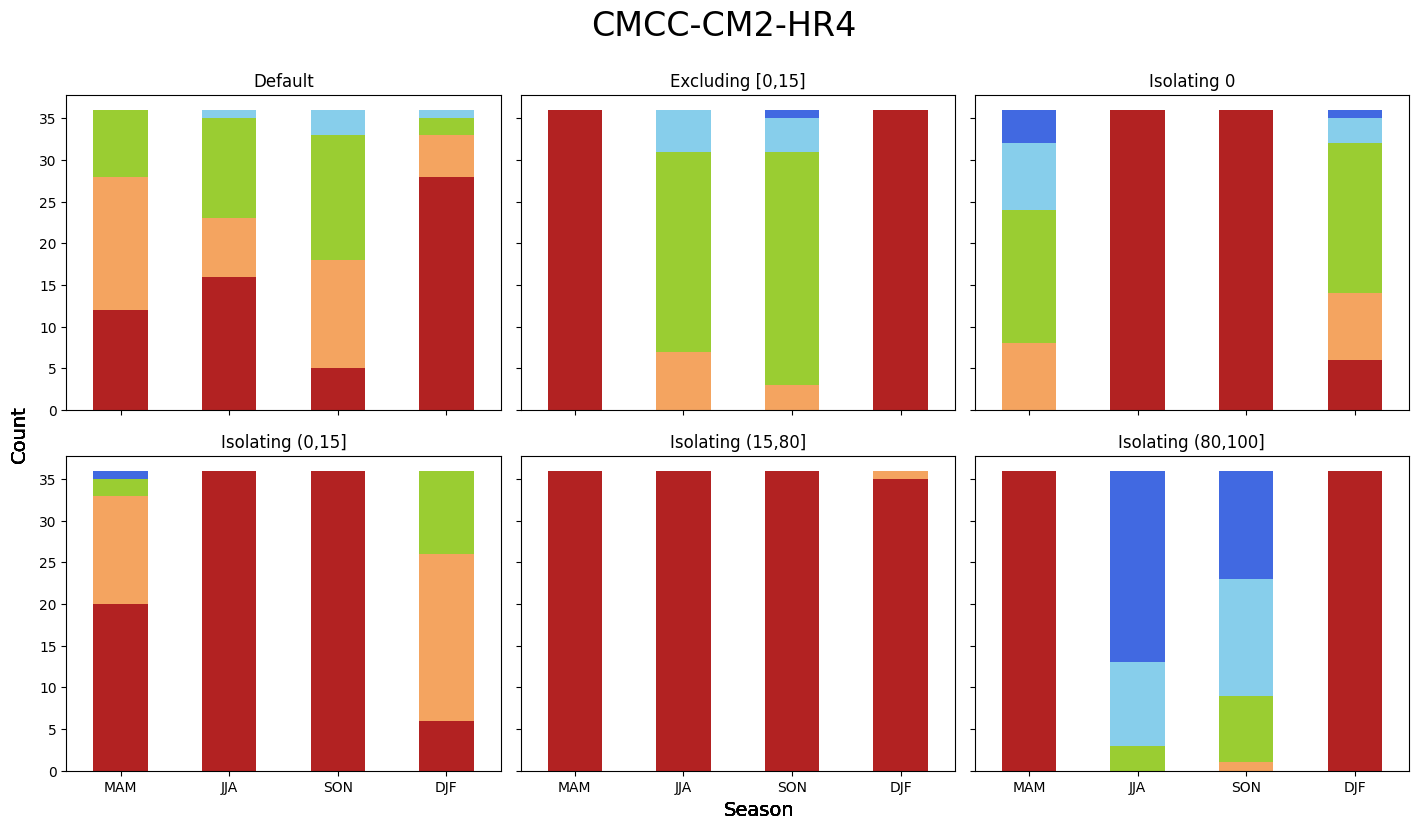

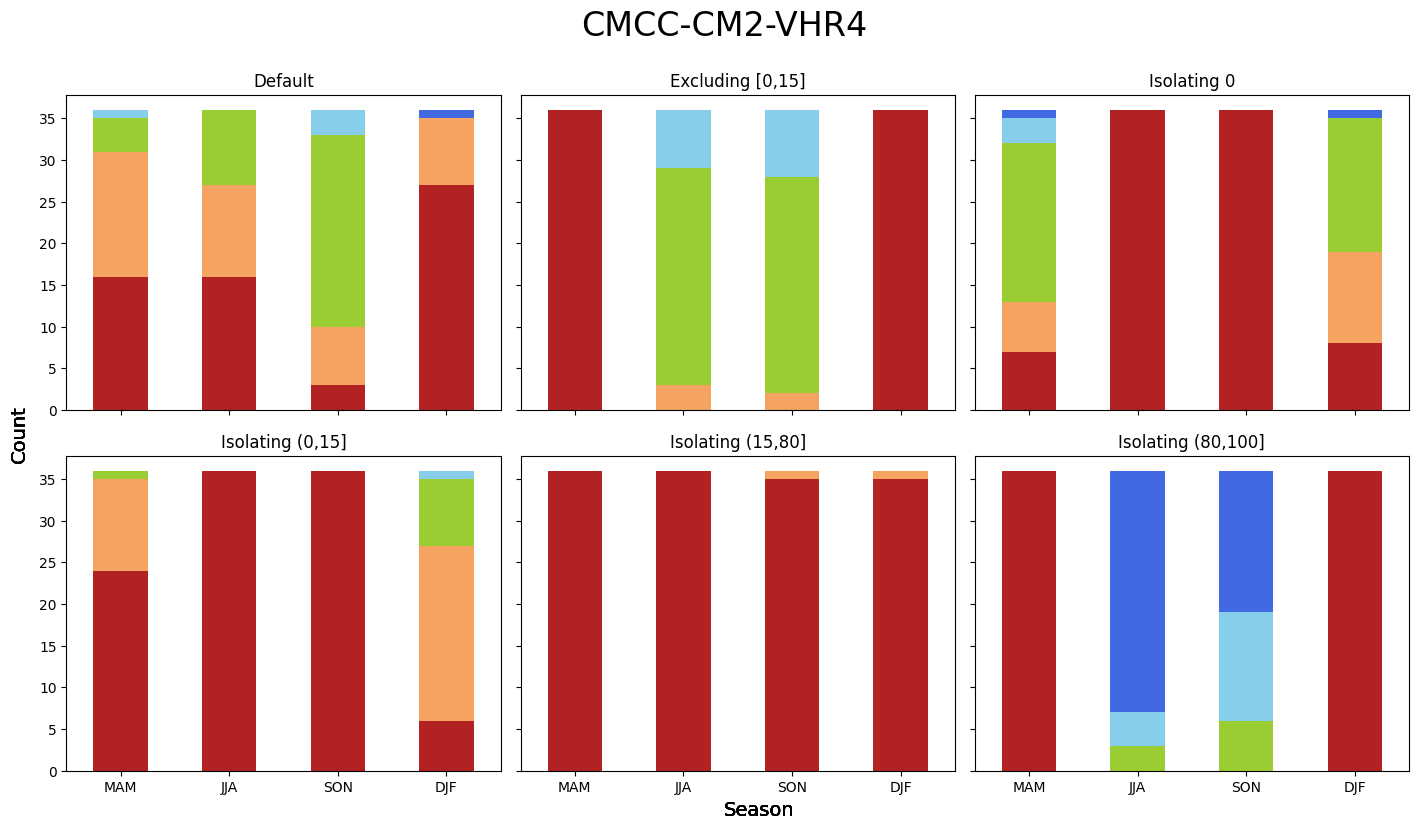

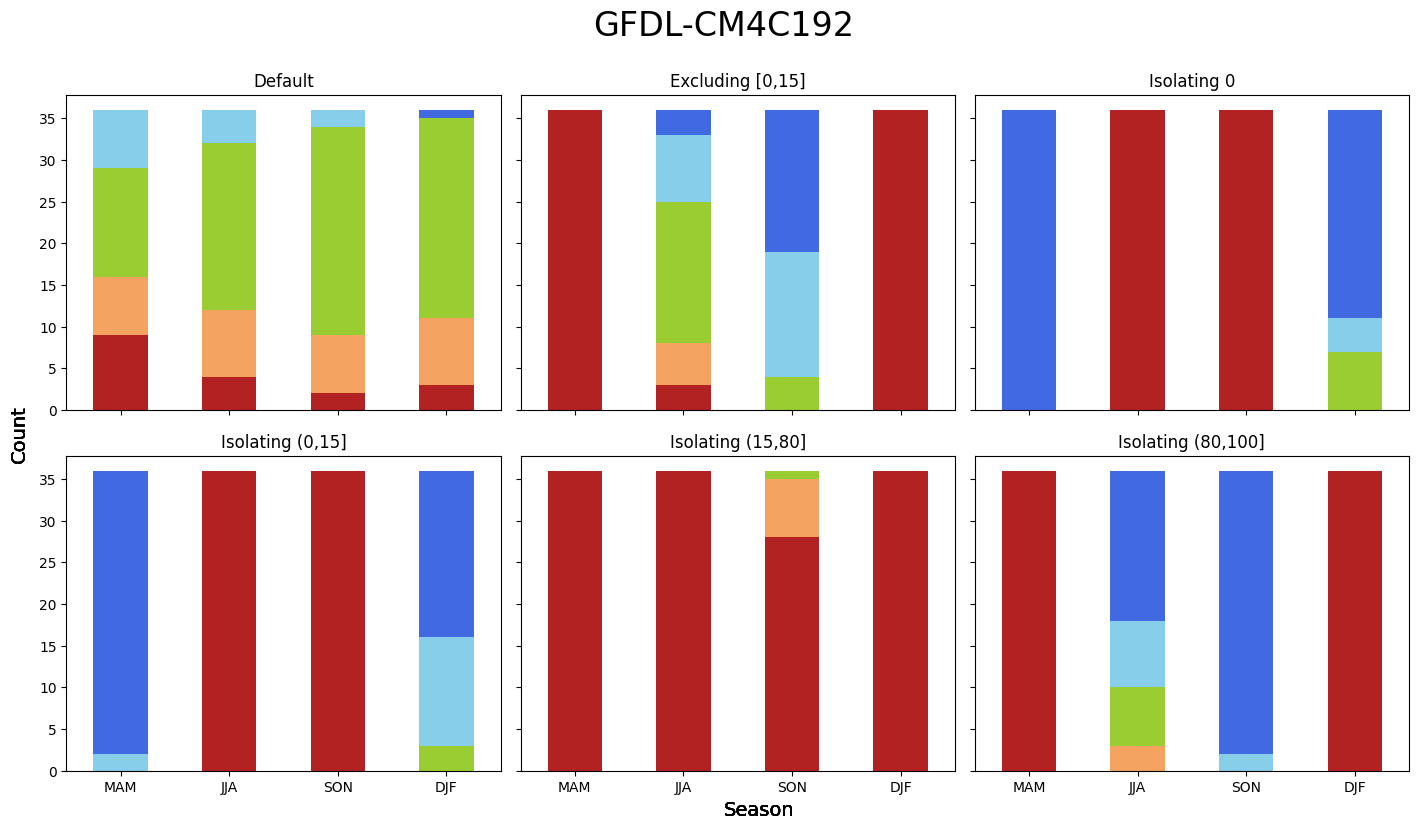

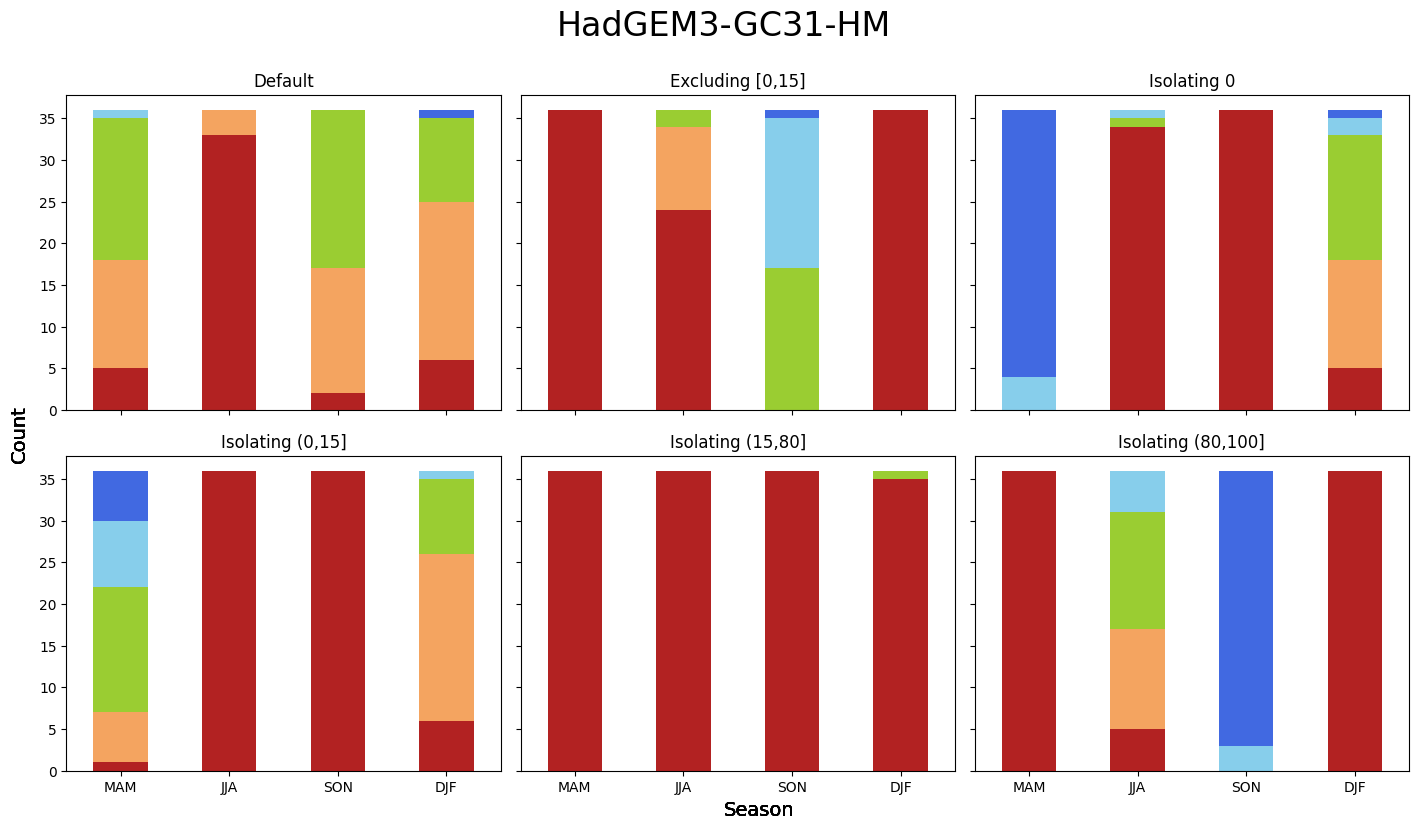

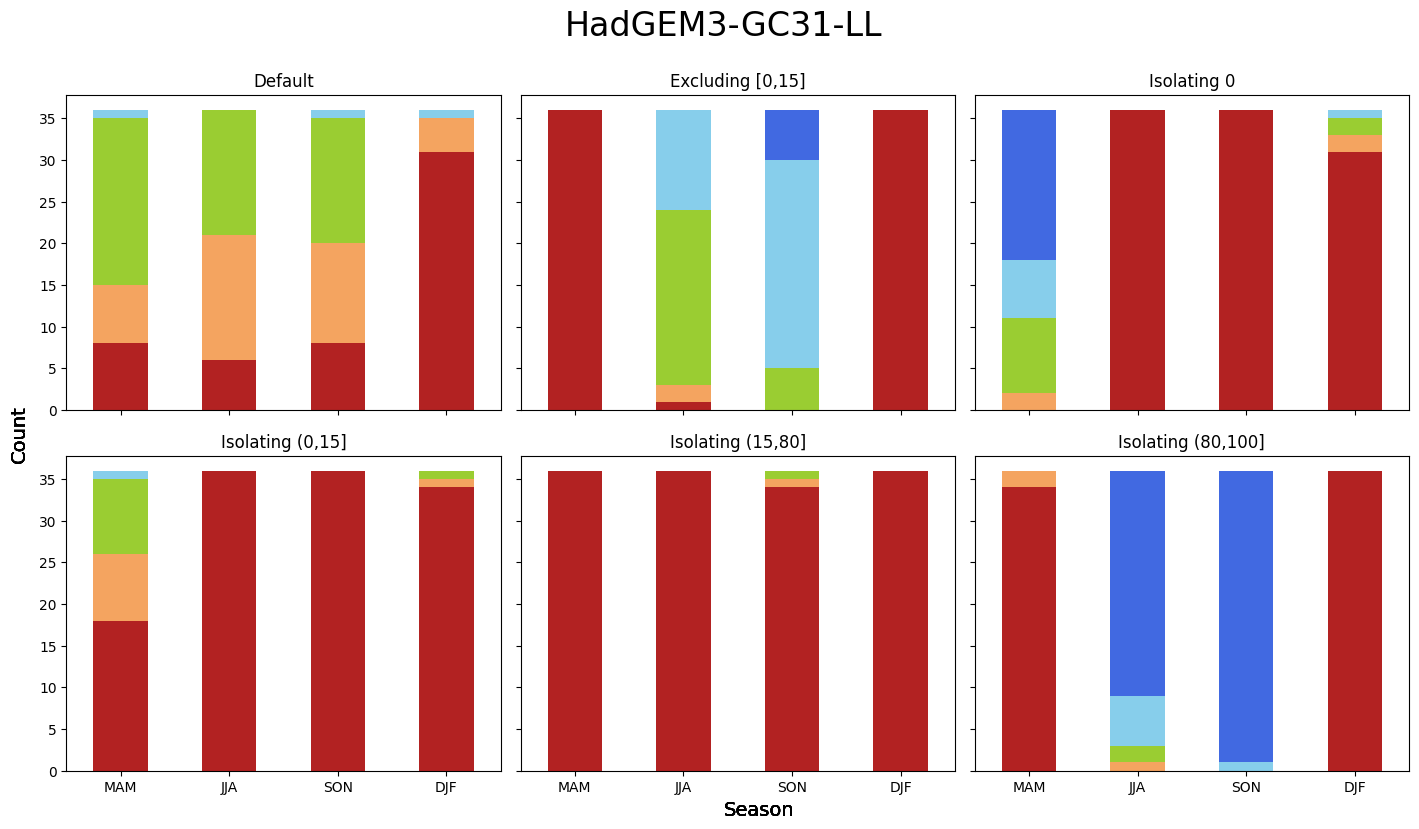

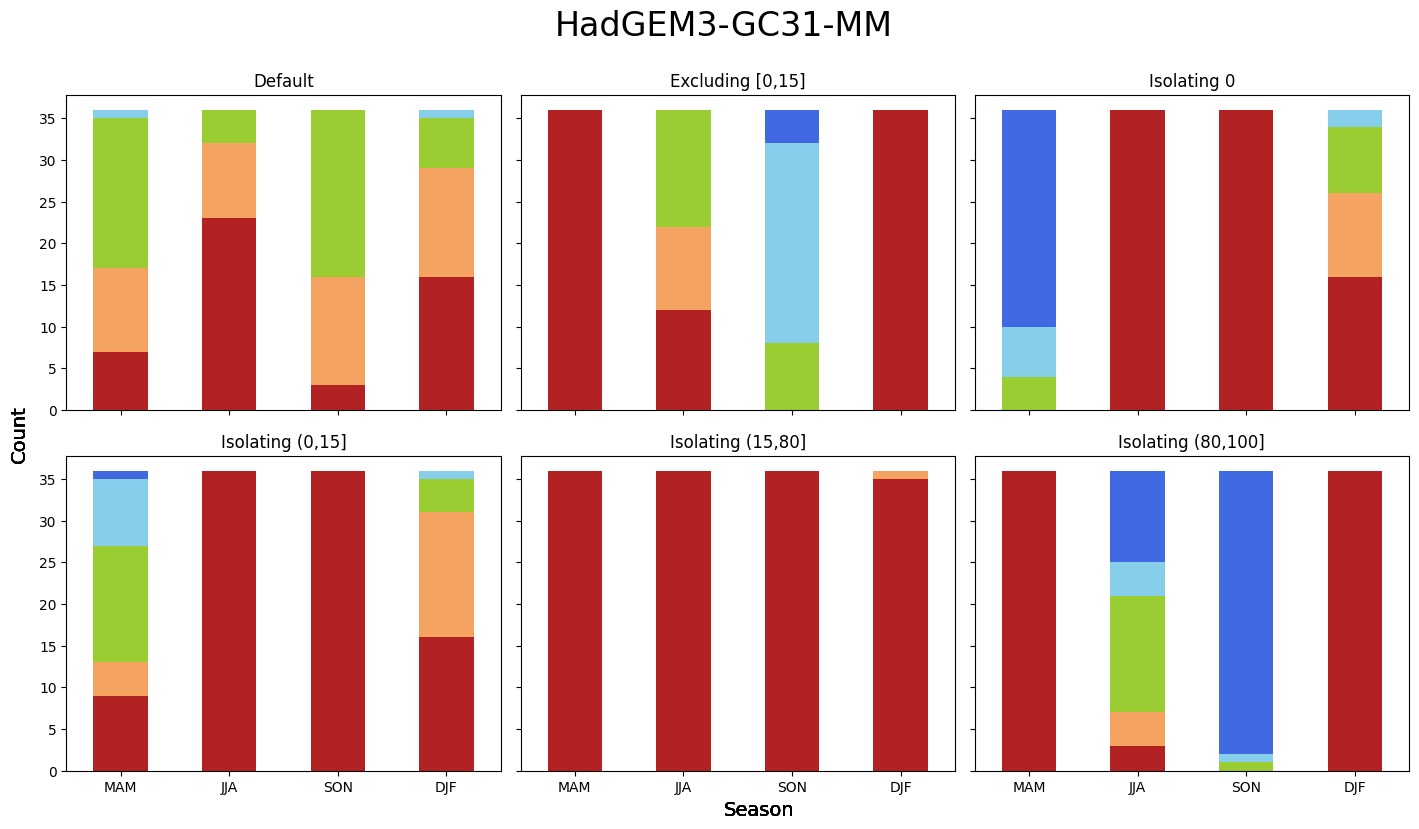

In [8]:
for j in range(0,mct,1):
    fig, axes = plt.subplots(2, 3, figsize=(14, 8))
    
    for i in range(vct):
        ax = axes[i // 3, i % 3]
        seasonal_data = MEF_b[i,j,:].resample(tdim='QS-DEC').mean()
        
        def bin_data(array, bins):
            return np.digitize(array, bins)
        
        binned_data = xr.apply_ufunc(
            bin_data, seasonal_data, 
            input_core_dims=[[]], kwargs={'bins': bins})
        
        df = binned_data.to_dataframe(name='value').reset_index()
        
        # Count occurrences in each bin
        df['bin'] = pd.cut(df['value'], bins=bins2, labels=labels)
        bin_counts = df.groupby([df['tdim'].dt.month, 'bin'], observed=False).size().unstack(fill_value=0)
        bin_counts.index = ['MAM', 'JJA', 'SON', 'DJF']
        
        # Plot stacked bar graph
        bin_counts.plot(kind='bar', stacked=True, color=[colors[label] for label in bin_counts.columns], ax=ax)
        
        ax.set_xticklabels(bin_counts.index, rotation=0)
        ax.set_title(f'{v[i]}'); ax.legend().remove()

        if i // 3 == 0:
            ax.set_xlabel(''); ax.set_xticklabels([])
        if i % 3 != 0:
            ax.set_ylabel(''); ax.set_yticklabels('');

        fig.text(-0.01, 0.47, 'Count', va='center', rotation='vertical', fontsize=14)
        fig.text(0.5, 0, 'Season', va='center', rotation='horizontal', fontsize=14)
        
    handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, title='MEF Category', bbox_to_anchor=(0.1, 1.01), loc = 'center', borderaxespad=0)
    fig.suptitle(f'{model[1,j].values}', fontsize=24, x=0.5, y=1)
    plt.tight_layout()
    # plt.savefig(f'/Data/PLOTS/Variations/Seasonal-Dist/{model[1,j].values}_SD-V.pdf', bbox_inches='tight') # Define desired plot image destination and name.

## 7b. Create Legend
Generate a legend compatible with all figures.

(0.0, 1.0, 0.0, 1.0)

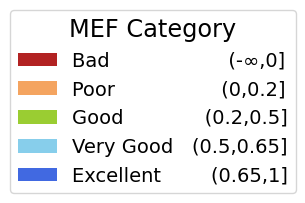

In [9]:
fig_legend, ax_legend = plt.subplots(figsize=(2, 2))
handles, labels = ax.get_legend_handles_labels()
fig_legend.legend(handles, labels, title='MEF Category', loc='center', ncol=1, fontsize=14, title_fontsize='xx-large')
ax_legend.axis('off')

### 8. Plot Monthly Performance Distributions
Define desired plot image destination and name.

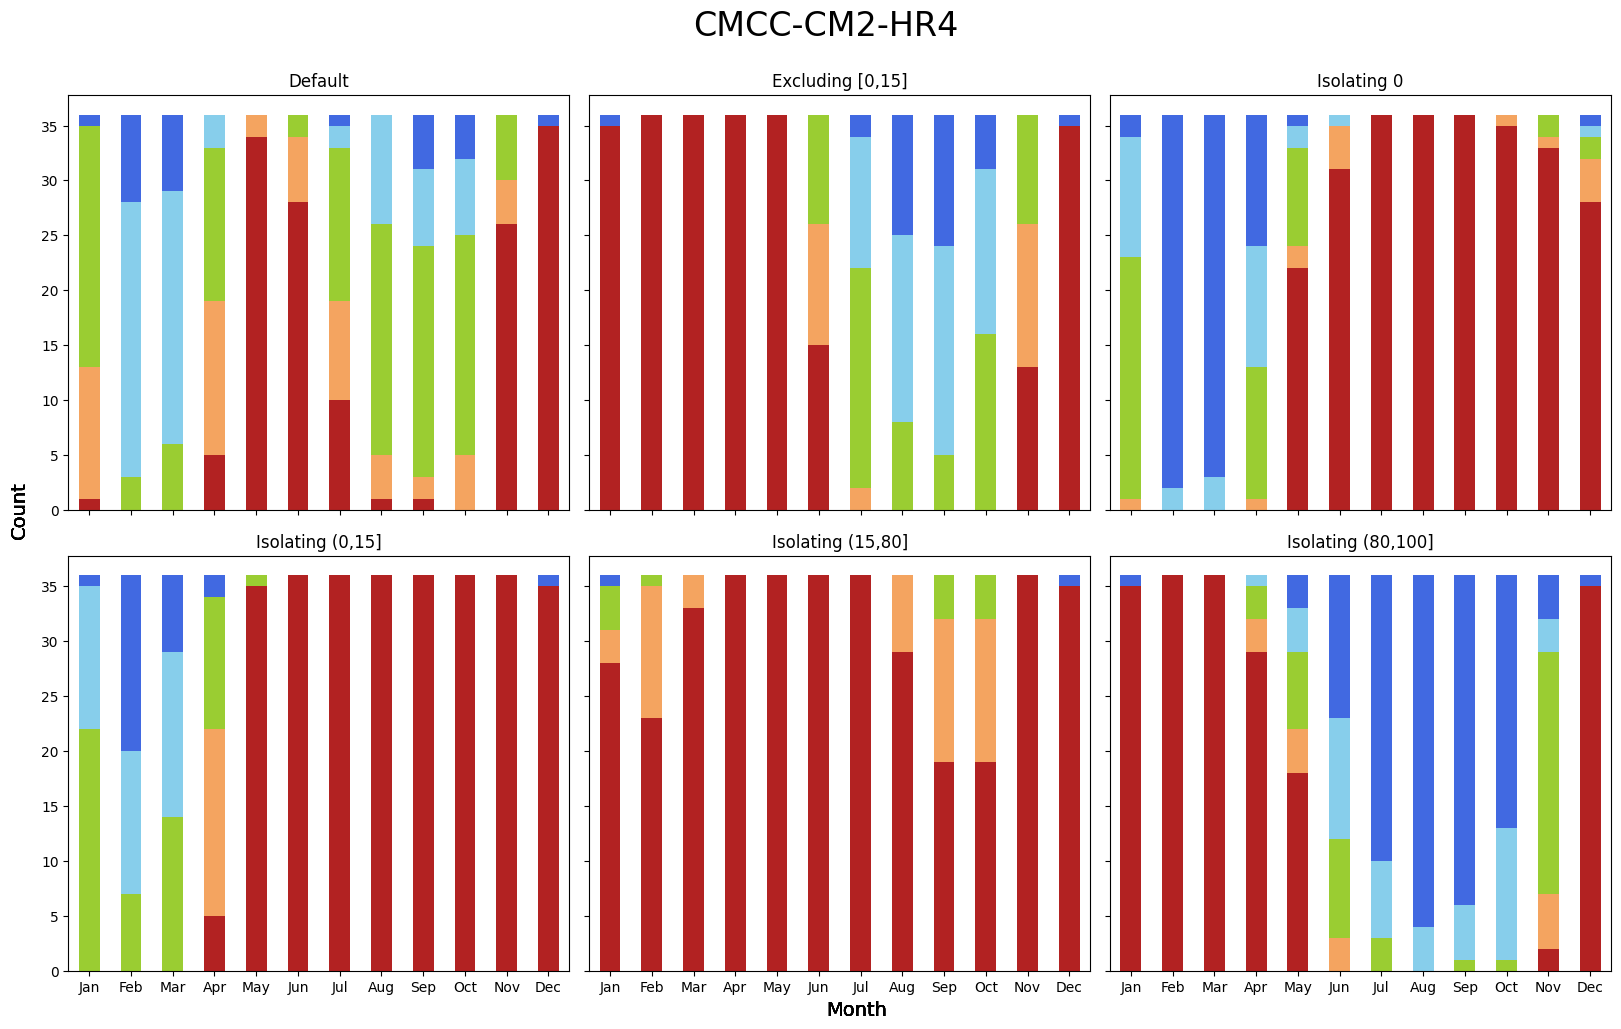

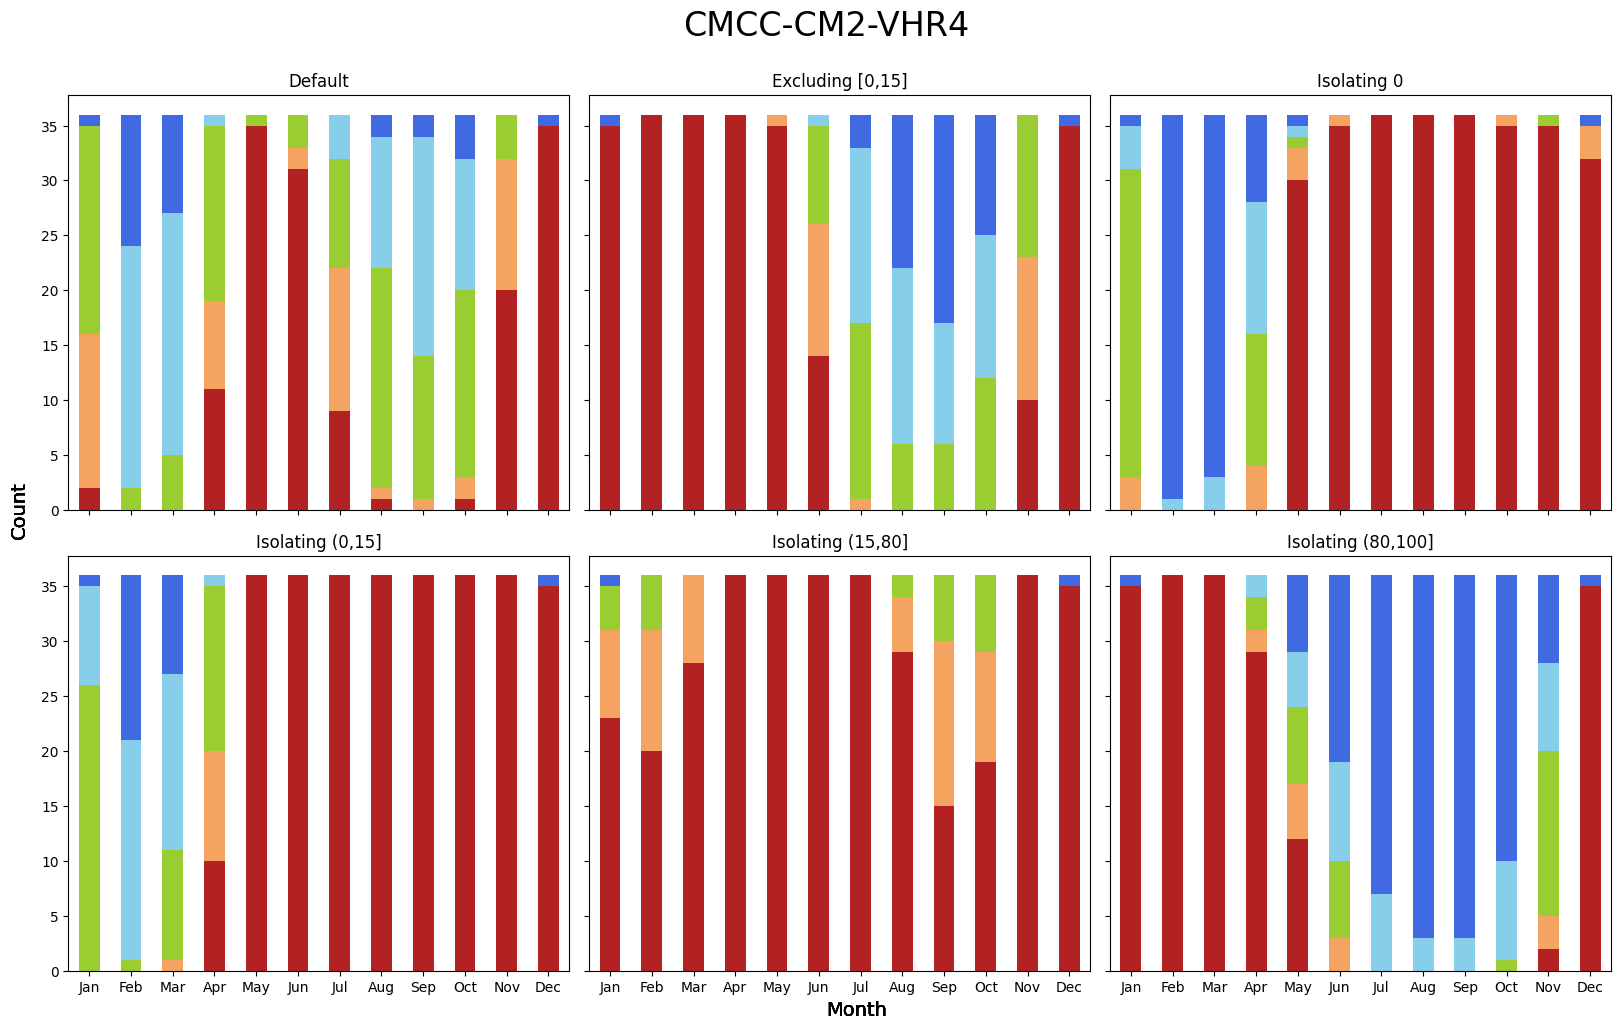

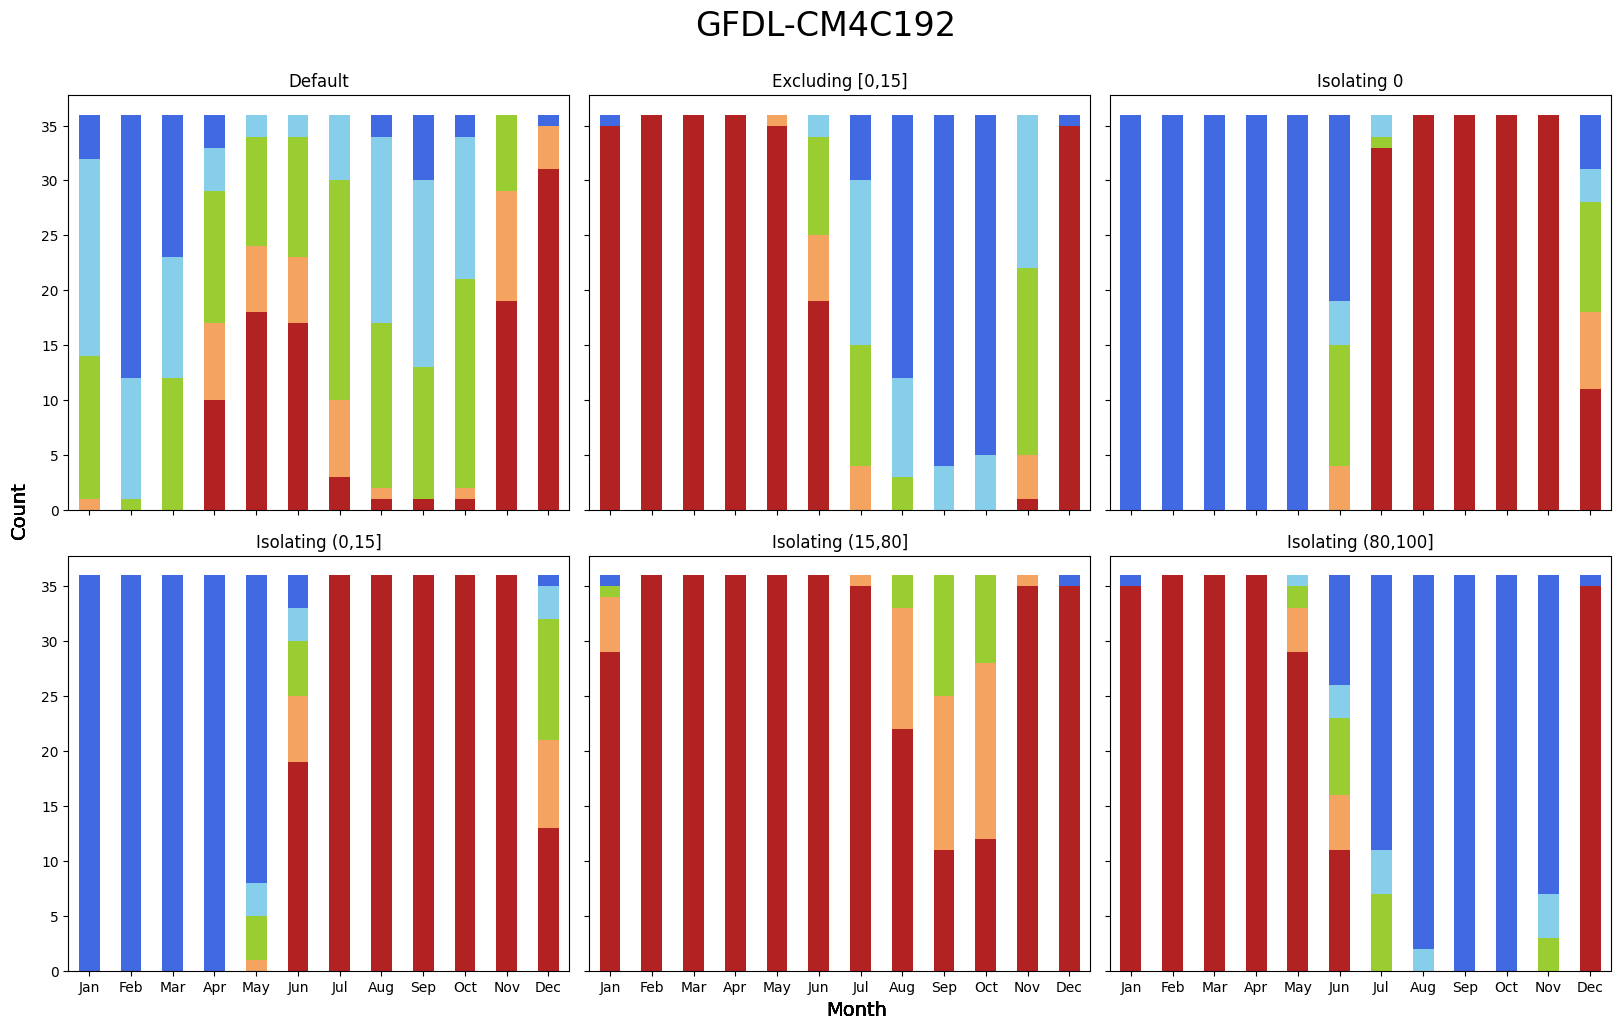

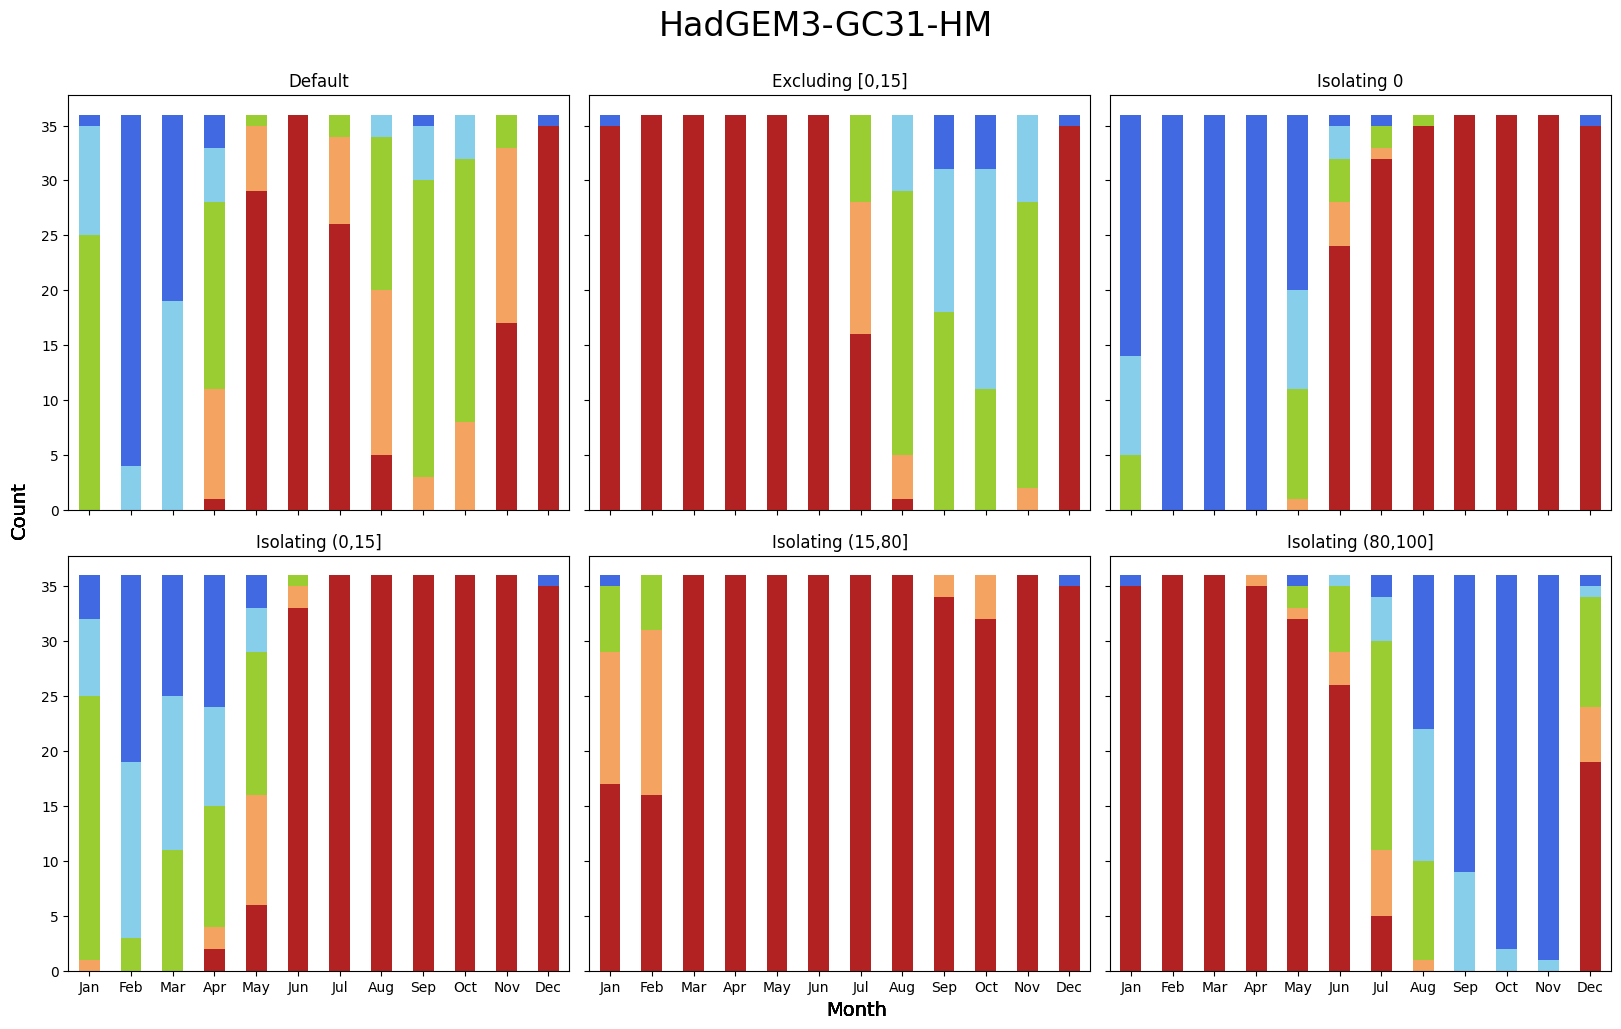

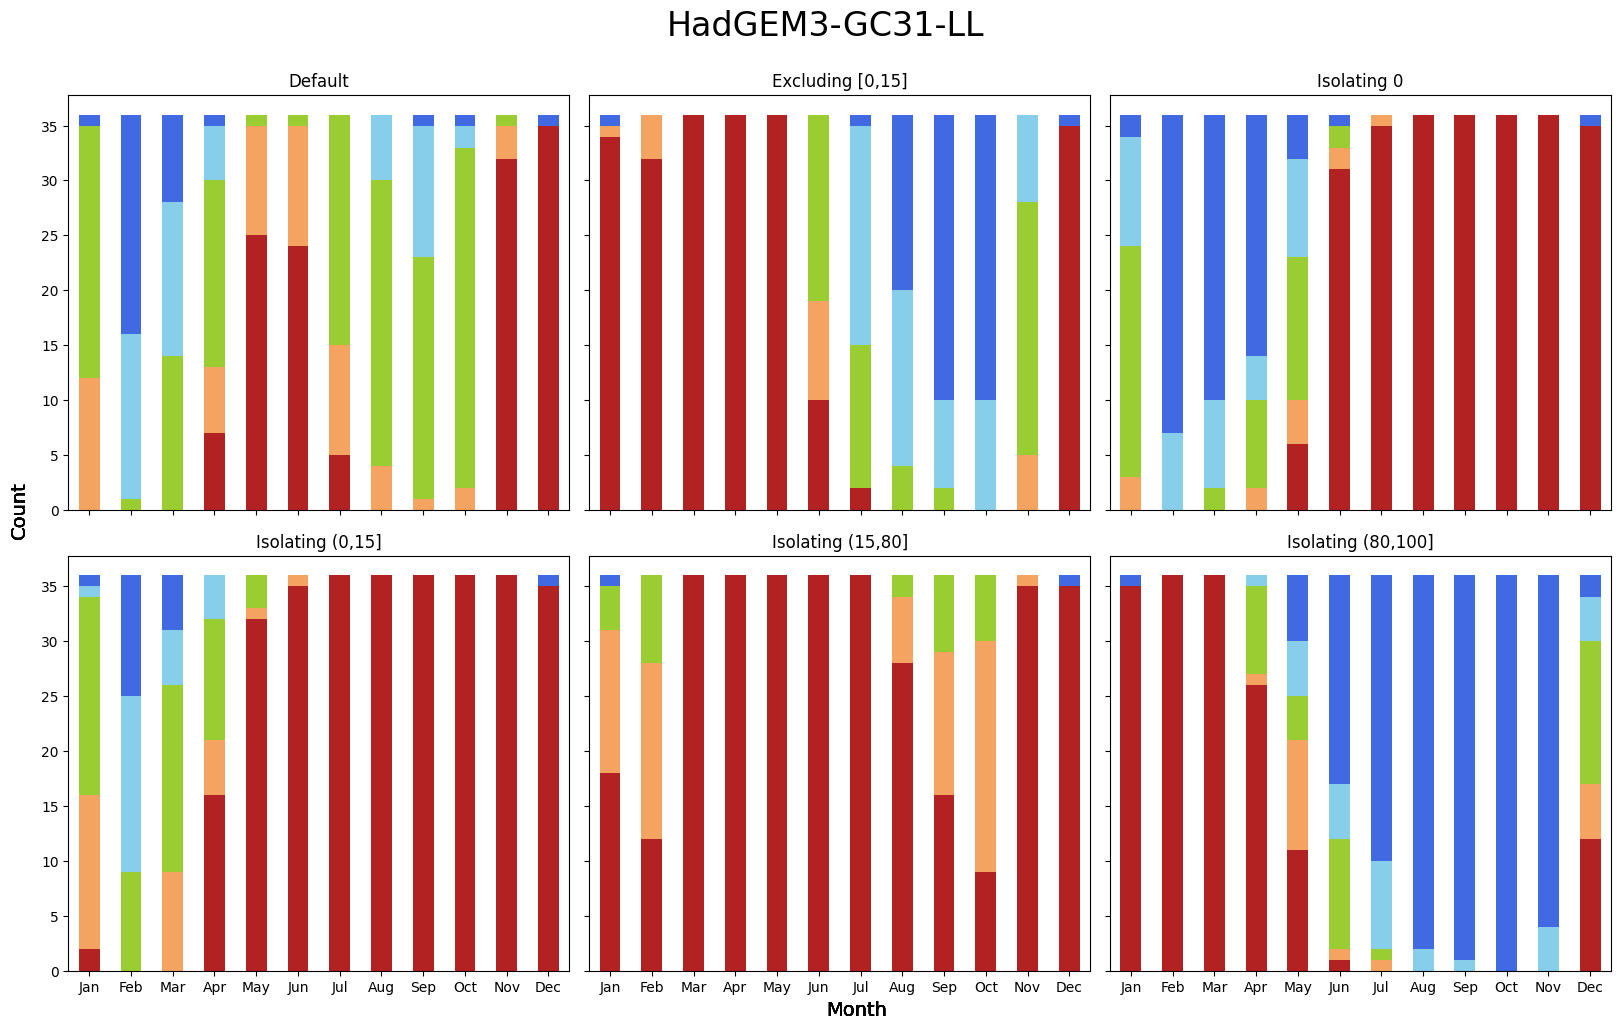

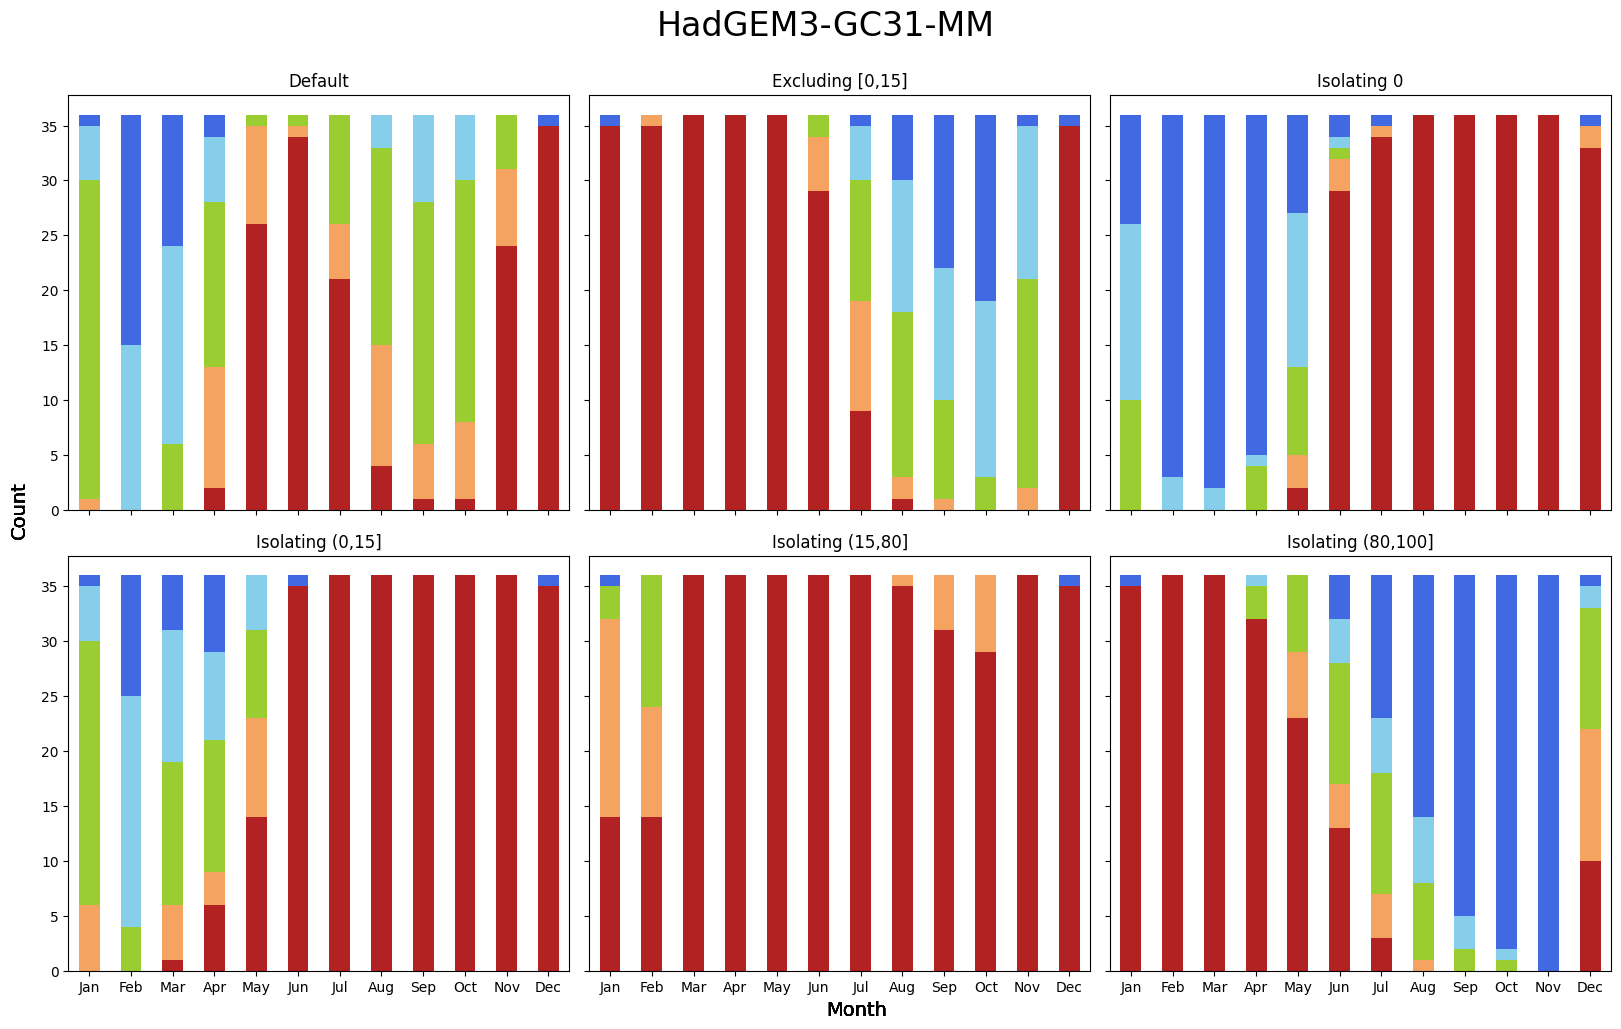

In [10]:
for j in range(0,mct,1):
    fig, axes = plt.subplots(2, 3, figsize=(16, 10)) # Adjust grid size here
    
    for i in range(vct):
        ax = axes[i // 3, i % 3]
        monthly_data = MEF_b[i,j,:].resample(tdim='MS').mean()
        
        def bin_data(array, bins):
            return np.digitize(array, bins)
        
        binned_data = xr.apply_ufunc(
            bin_data, monthly_data, 
            input_core_dims=[[]], kwargs={'bins': bins})
        
        df = binned_data.to_dataframe(name='value').reset_index()
        
        # Count occurrences in each bin
        df['bin'] = pd.cut(df['value'], bins=bins2, labels=labels)
        bin_counts = df.groupby([df['tdim'].dt.month, 'bin'], observed=False).size().unstack(fill_value=0)
        bin_counts.index = pd.to_datetime(bin_counts.index, format='%m').strftime('%b')
        
        # Plot stacked bar graph
        bin_counts.plot(kind='bar', stacked=True, color=[colors[label] for label in bin_counts.columns], ax=ax)
        
        ax.set_xticklabels(bin_counts.index, rotation=0)
        # ax.set_xlabel('Month'); ax.set_ylabel('Count'); 
        ax.set_title(f'{v[i]}'); ax.legend().remove(); ax.set_xlabel('');

        if i // 3 == 0:
            ax.set_xticklabels('')
        if i % 3 != 0:
            ax.set_ylabel(''); ax.set_yticklabels('');

        fig.text(-0.01, 0.5, 'Count', va='center', rotation='vertical', fontsize=14)
        fig.text(0.5, 0, 'Month', va='center', rotation='horizontal', fontsize=14)
        
    handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, title='MEF Category', bbox_to_anchor=(0.1, 1.01), loc = 'center', borderaxespad=0)
    fig.suptitle(f'{model[1,j].values}', fontsize=24, x=0.5, y=1)
    plt.tight_layout()
    # plt.savefig(f'/Data/PLOTS/Variations/Monthly-Dist/{model[1,j].values}_MD-V.pdf', bbox_inches='tight') # Define desired plot image destination and name.

### 11. MEF Compressed Values
Define desired plot image destination and name.

In [11]:
colors = [
    (0, "firebrick"),(0.2, "sandybrown"),(0.5, "yellowgreen"),(0.65, "deepskyblue"),(1.0, "royalblue")]
cmap = plt.cm.colors.LinearSegmentedColormap.from_list("custom_gradient", colors)
norm =mcolors.Normalize(vmin=0, vmax=1)

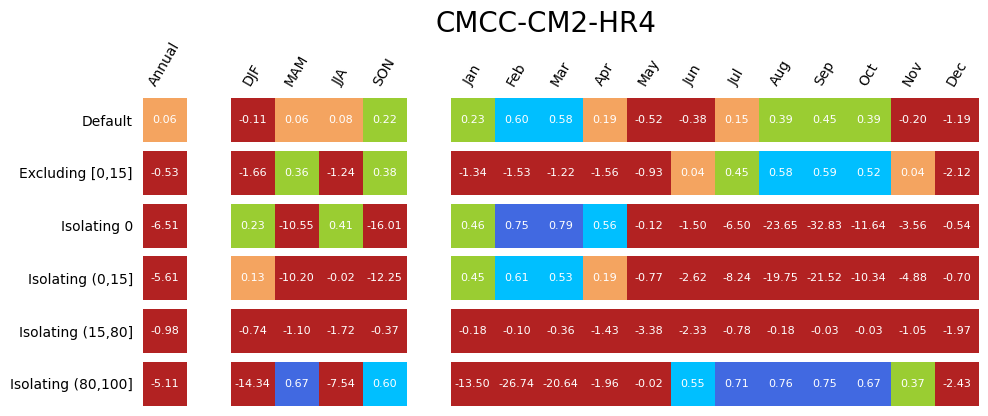

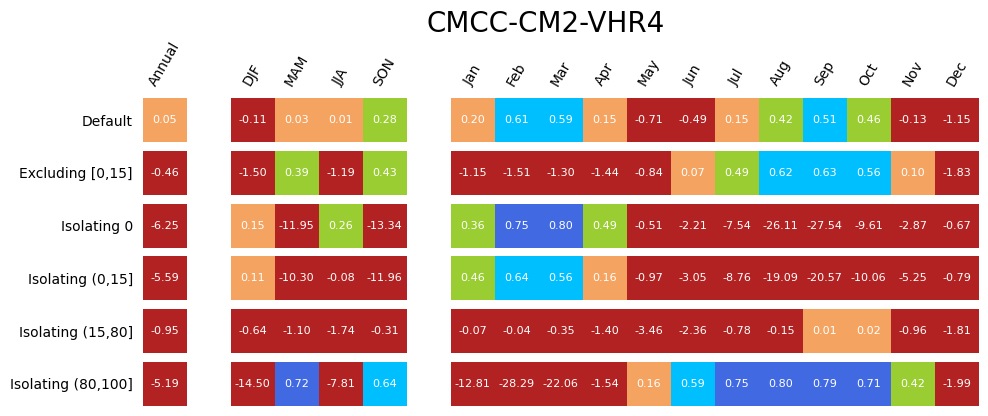

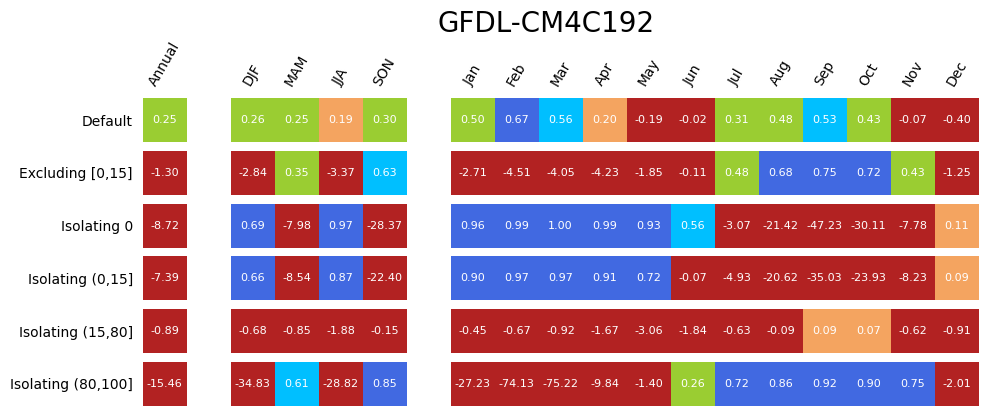

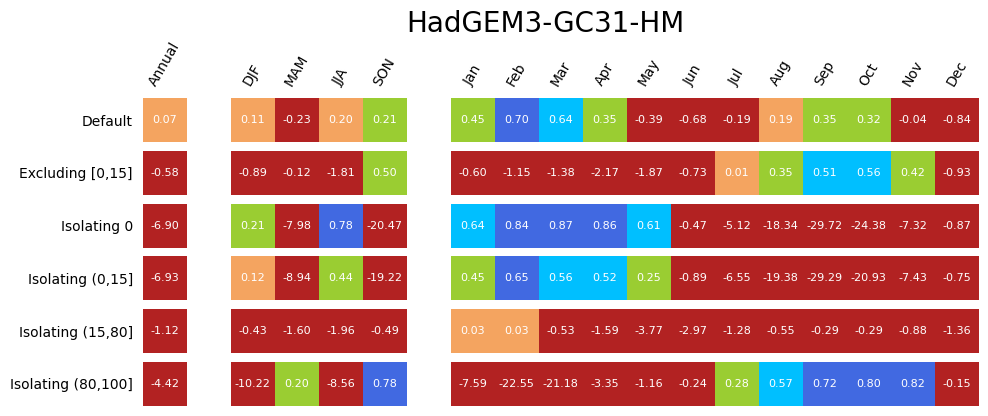

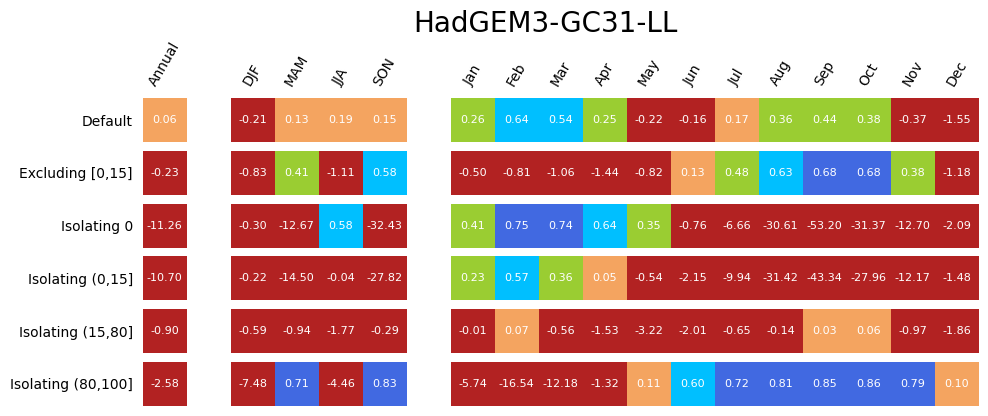

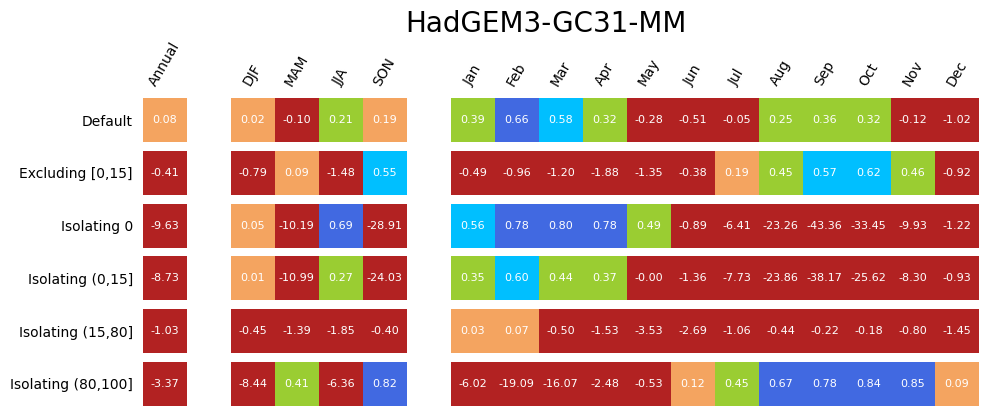

In [12]:
levels=[-100, 0, 0.2, 0.5, 0.65, 1.0]
colors = ['firebrick','sandybrown','yellowgreen','deepskyblue','royalblue']
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(levels, cmap.N, clip=True)

for k in range(0,mct,1):
    fig, axes = plt.subplots(vct, 1, figsize=(12, 4))
    
    for i in range(vct):
        ax = axes[i]
        MEFA = MEF_b[i,k,:].mean(dim='tdim').values
        MEFS = MEF_b[i,k,:].groupby('time.season').mean(dim='tdim').values
        MEFM = MEF_b[i,k,:].groupby('time.month').mean(dim='tdim').values
        MEF_heat = np.concatenate([[MEFA], [np.nan], MEFS, [np.nan], MEFM])
        values = MEF_heat.reshape(1,-1)
        
        cax = ax.matshow(values, cmap=cmap, norm=norm)
        
        ax.set_yticks([0]); 
        ax.set_yticklabels([f'{v[i]}'])
        custom_labels = ['Annual','','DJF','MAM','JJA','SON','',
                         'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
        if i == 0:
            ax.set_xticks(np.arange(values.shape[1]))
            ax.set_xticklabels(custom_labels, rotation=60)
        else:
            ax.set_xticks([])
        ax.tick_params(axis='y', left=False)
        ax.tick_params(axis='x', which='both', bottom=False, top=False)
        
        for (i, j), val in np.ndenumerate(values):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', size=8)
        for spine in ax.spines.values():
            spine.set_visible(False)
    
    fig.suptitle(f'{model[1,k].values}', fontsize=20, x=0.5, y=1.1)
    # plt.savefig(f'/Data/PLOTS/Variations/Compressed-PI/{model[1,k].values}_PI-V.pdf', bbox_inches='tight') # Define desired plot image destination and name.